# Baseball Case Study 

Baseball Case Study Data Description:

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

Runs,
At Bats,
Hits,
Doubles,
Triples,
Homeruns,
Walks,
Strikeouts,
Stolen Bases,
Runs Allowed,
Earned Runs,
Earned Run Average (ERA),
Shutouts,
Saves,
and Errors

Number of predicted wins (W)

### Here we start the project by importing essential Libraries for Importing Datasets, EDA, Data Cleaning, Model Building, Removing Outliers, Skewness and Predicting the Wins

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import joblib
import warnings
from scipy.stats import zscore
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import power_transform, LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
warnings.filterwarnings('ignore')
%matplotlib inline

As we have completed importing of Essesential Libraries not we will import the data and look at the data closely

In [2]:
#here we are importing the data using pandas.read_csv()method and saving it in ds varible
ds = pd.read_csv("~/Desktop/Datatrained/Base Ball Case Study/baseball.csv")

Now we will see the first 5 rows of the dataset using ds.head()

In [3]:
ds.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


from above we can see that the columns are mixture of int64 and float64 type of data lets see the count of datatype using ds.info() it will give all the infromation about the data

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


from above we can see that there are 16 int64 data types and 1 float64 data type

from above we can see that there are 30 rows and 17 columns and there is no missing values in the dataset lets check it by using ds.isnull().sum()

it will give the missing values in the dataset

In [5]:
ds.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

from above we can also see that there is no missing values in the dataset lets visualize this using heatmap

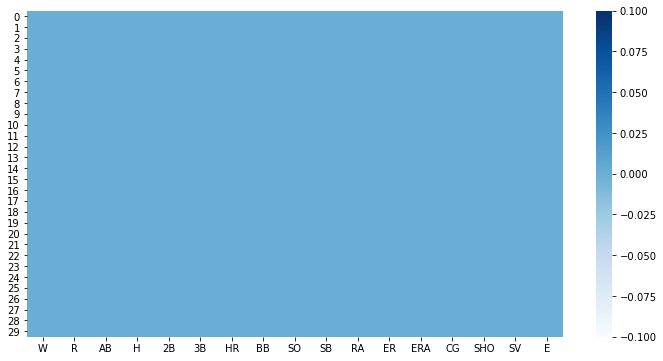

In [6]:
plt.figure(figsize = (12,6))
sns.heatmap(ds.isnull(), cmap = 'Blues')

As there is no missing values in the dataset there is only 1 color in the heatmap otherwise there woulf be white where the data is missing

lets no see the shape of the data by using ds.shape

In [7]:
r, c = ds.shape
print("There are {} no of rows and {} no of columns in the dataset.".format(r, c))

There are 30 no of rows and 17 no of columns in the dataset.


so we can see that there are 30 rows and 17 columns in the dataset

lets see some stastics about the dataset by using ds.describe()

In [8]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
W,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
R,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
AB,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
H,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
2B,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
3B,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
HR,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
BB,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
SO,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
SB,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


from here we can see high number of outliers in the dataset by looking at the mean and the Standard deviation let us visualize this will help us to know easily

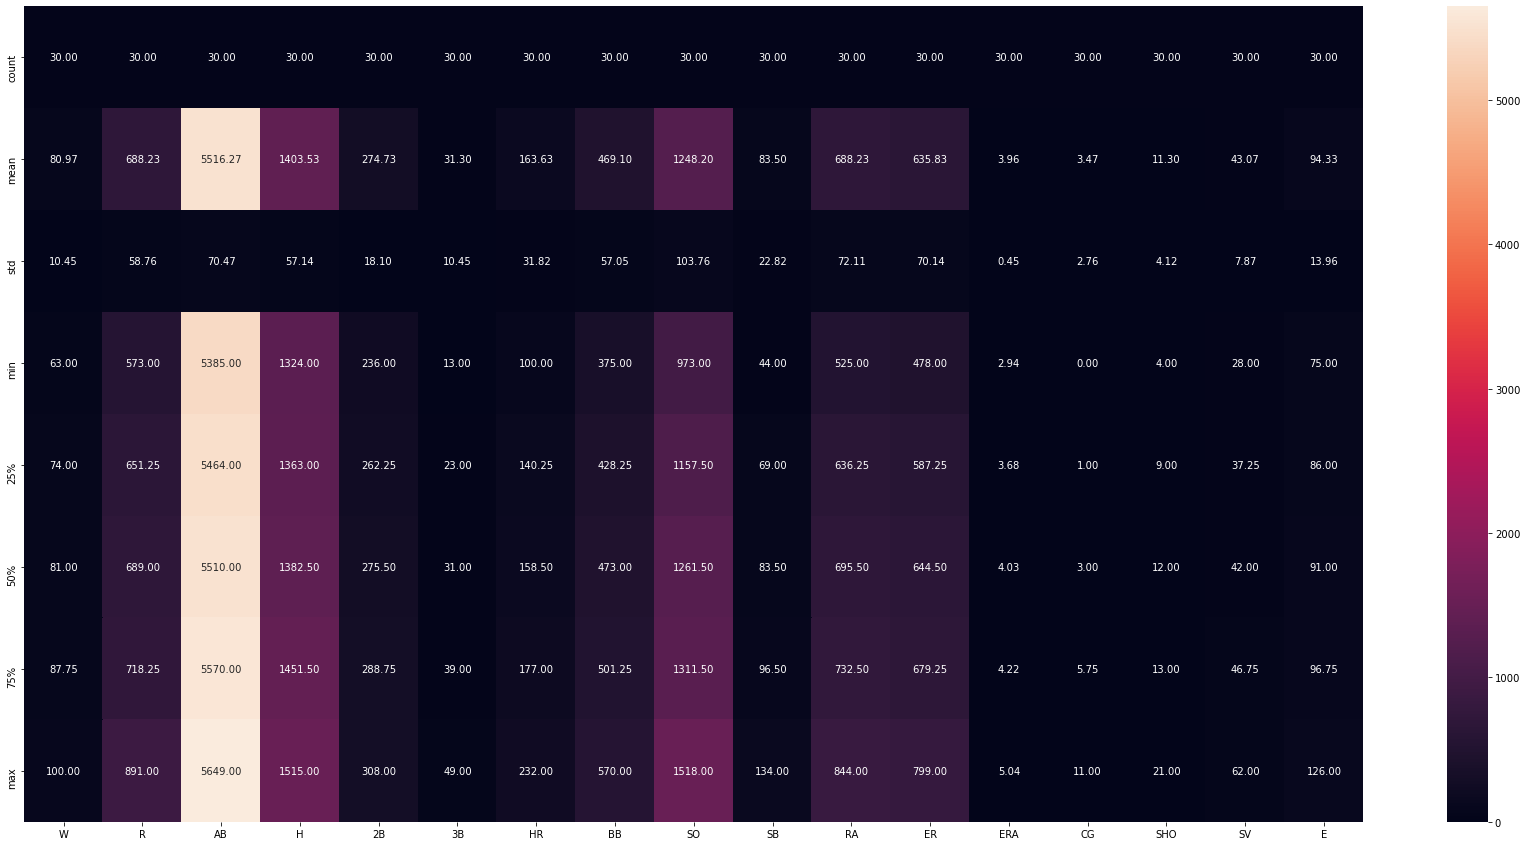

In [9]:
plt.figure(figsize = (30,15))
sns.heatmap(ds.describe(), annot = True, fmt = '.2f')

So here we can spot the outliers easily in the dataset we will fix it in later point of time

By using the below option we can see all the rows of the dataset easily

In [10]:
pd.set_option('display.max_rows', None)

In [11]:
ds

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


As we have to predict the wins we will be using Regression model to predict

In [12]:
ds.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

### Lets Start EDA process 

In [13]:
ds.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [14]:
def scatter(x):
    plt.figure(figsize = (12,6))
    plt.title("Scatter plot for column {}".format(x))
    plt.xlabel(x)
    plt.ylabel("Index")
    sns.scatterplot(ds[x], ds.index)

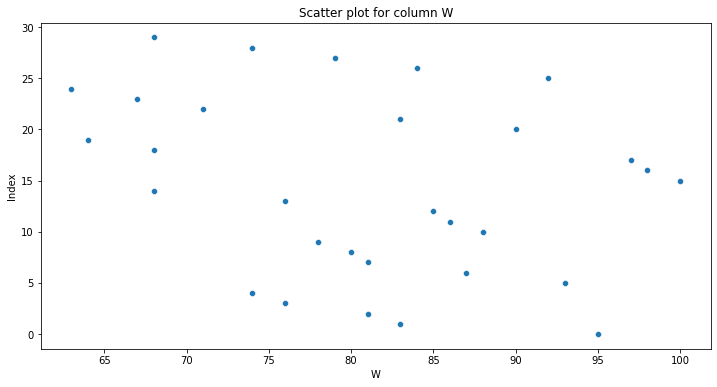

In [15]:
scatter('W')

from above scatter plot we can see that there are 100 wins by one teams by looking at the plot we can see that the column has very good distribution of data and there is no outliers.

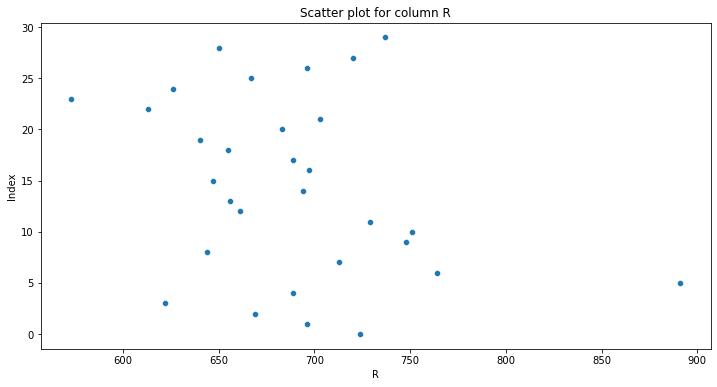

In [16]:
scatter('R')

from above plot of Runs we can see that there is a runs which is nearly to 900 from this we can understand that only 1 datapoint has highest runs that is 891 it can be an outlier but we can check it in later stage

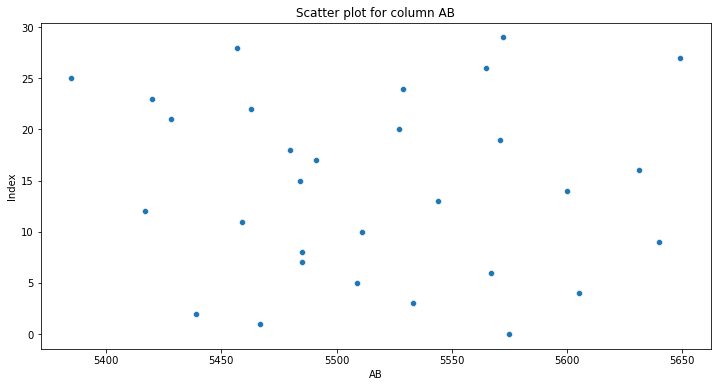

In [17]:
scatter('AB')

At bat column is also normaly distributed by looking at this we can't see any outliers

In [18]:
ds.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

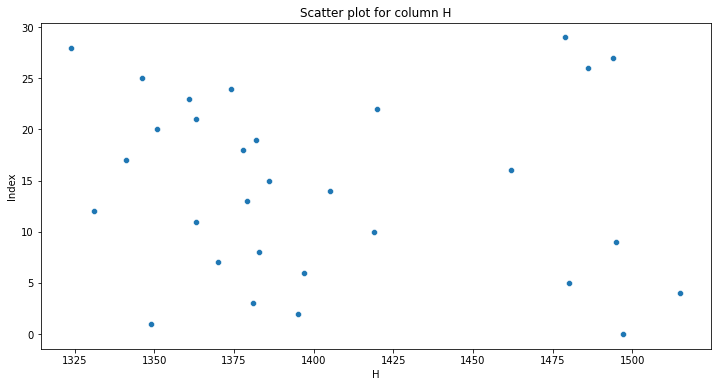

In [19]:
scatter('H')

Nicely Distributed

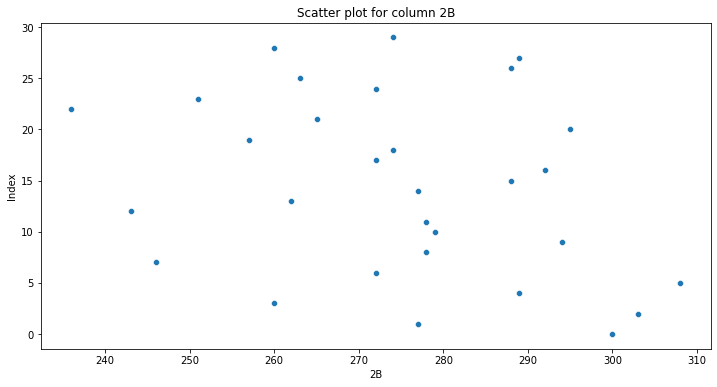

In [20]:
scatter('2B')

Nicely Distributed

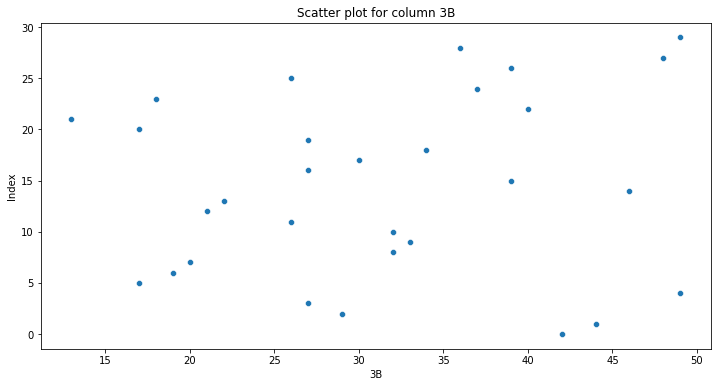

In [21]:
scatter('3B')

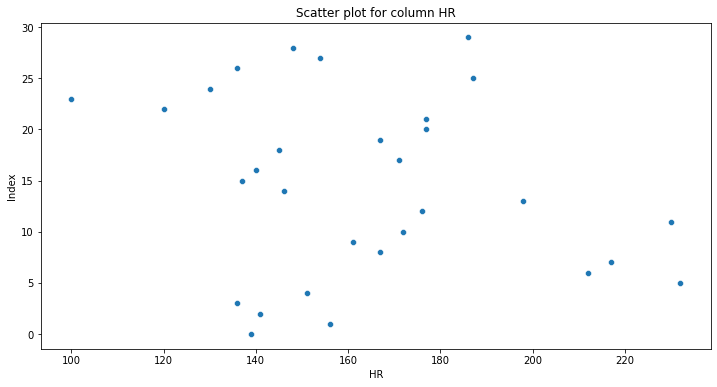

In [22]:
scatter('HR')

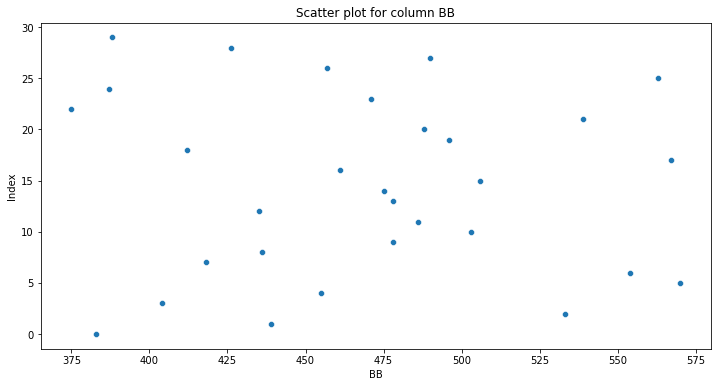

In [23]:
scatter('BB')

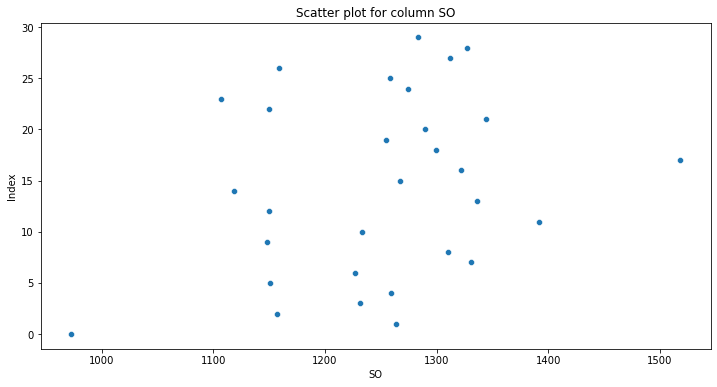

In [24]:
scatter('SO')

in strikeout column we can see 2 values one at extereme right and another is at extream left

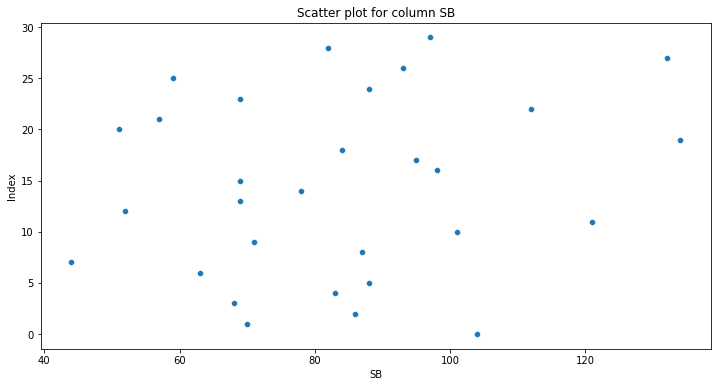

In [25]:
scatter('SB')

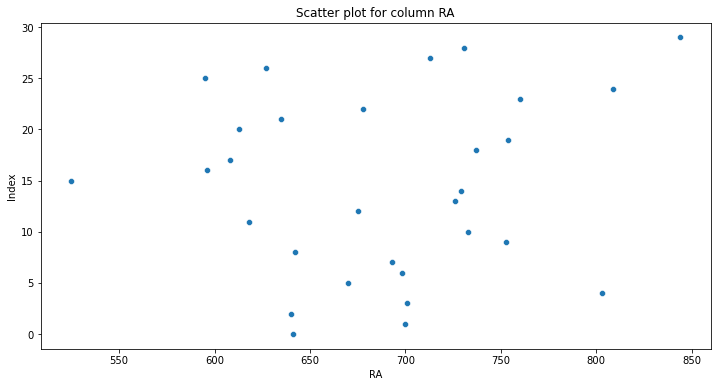

In [26]:
scatter('RA')

Runs allowed also has 2 values at extreme sides

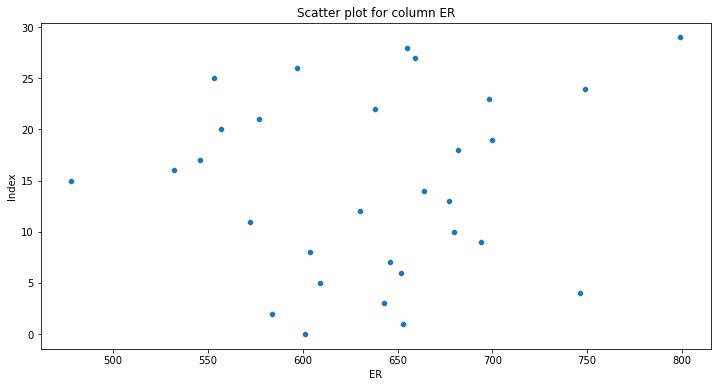

In [27]:
scatter('ER')

Earned Runs also has 2 extreme values one to the left and another to the right

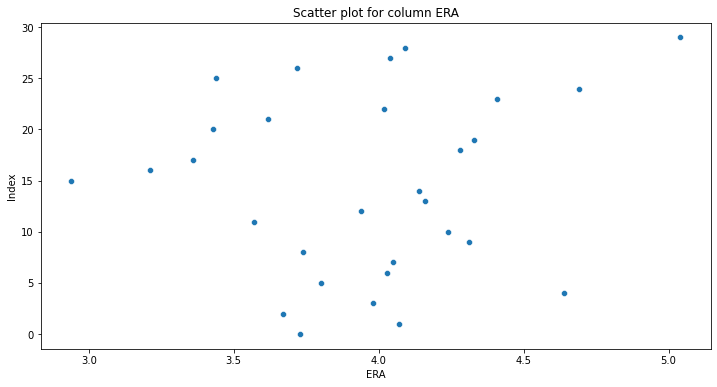

In [28]:
scatter('ERA')

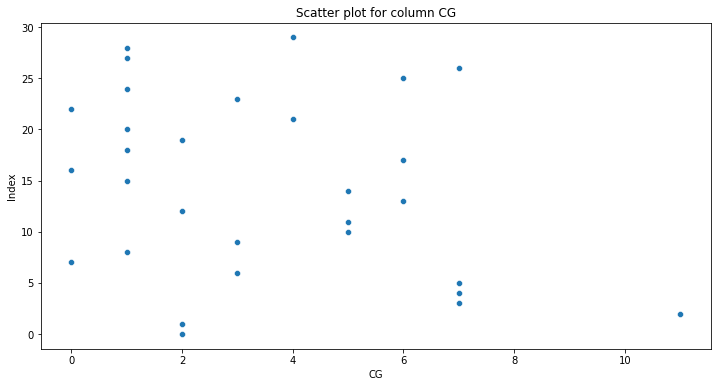

In [29]:
scatter('CG')

there is a datapoint at the extream right

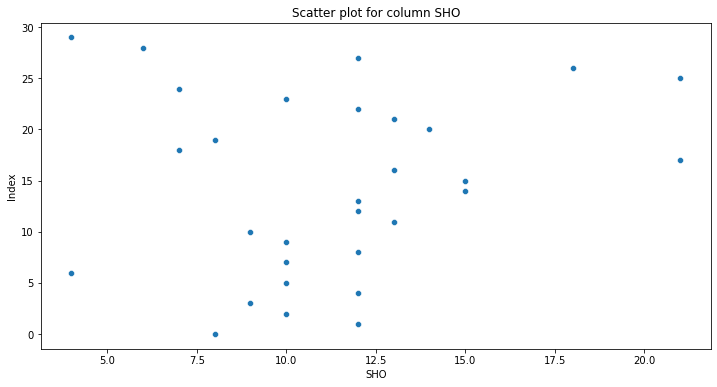

In [30]:
scatter('SHO')

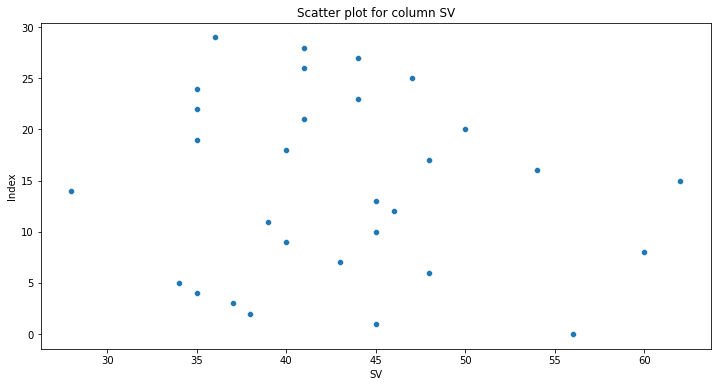

In [31]:
scatter('SV')

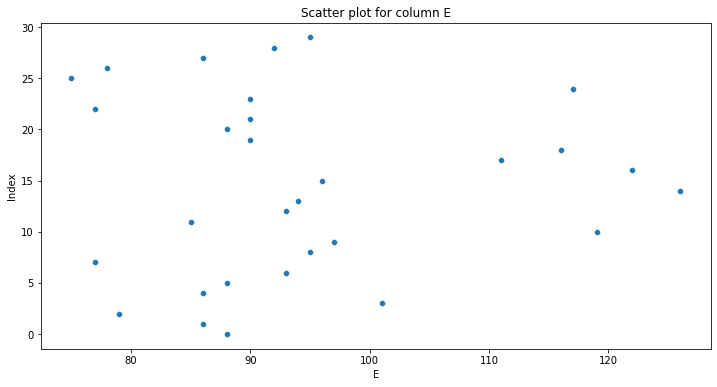

In [32]:
scatter('E')

In [33]:
def scatterbi(X):
    plt.figure(figsize = (12,6))
    plt.title("Scatter plot for column Wins & {}".format(X))
    plt.xlabel(X)
    plt.ylabel("Wins")
    sns.scatterplot(ds[X], ds['W'])

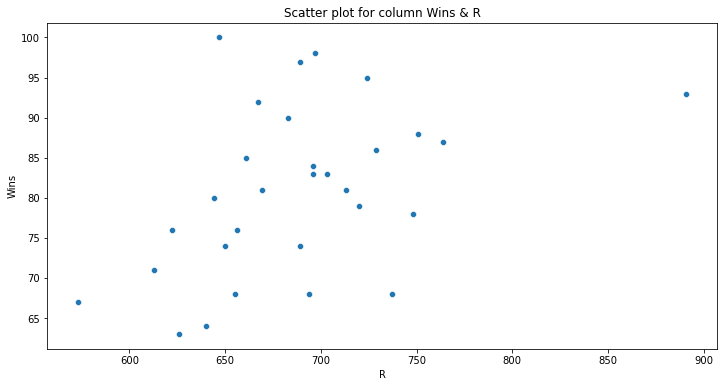

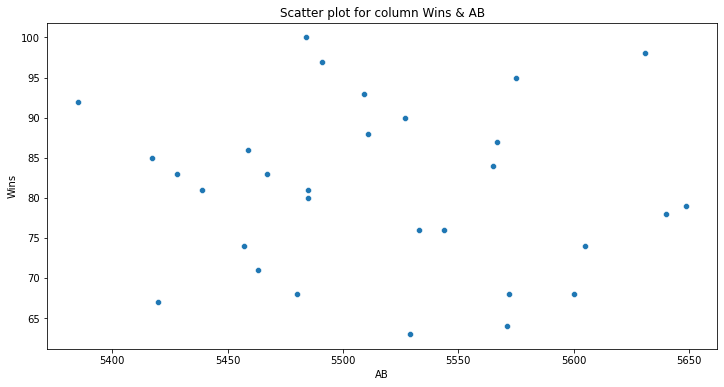

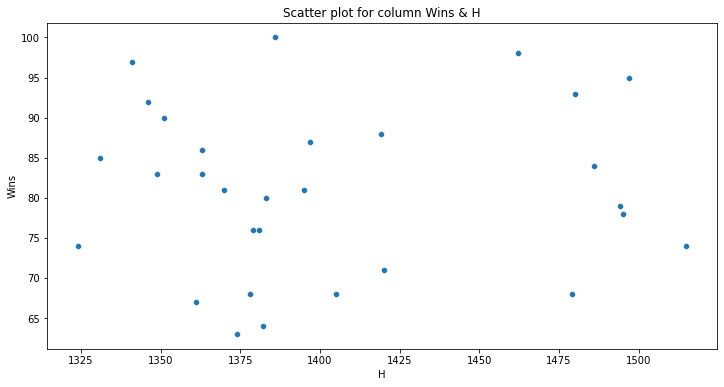

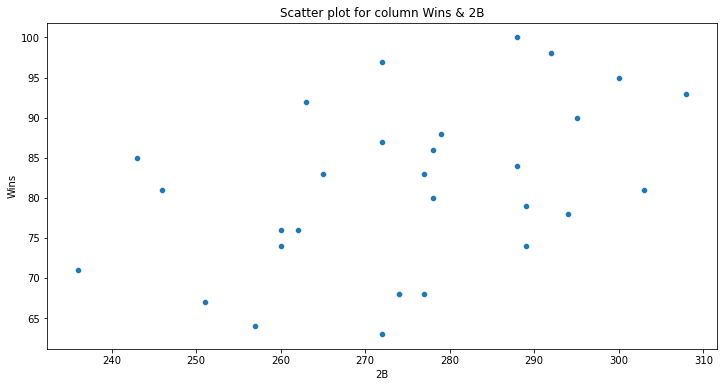

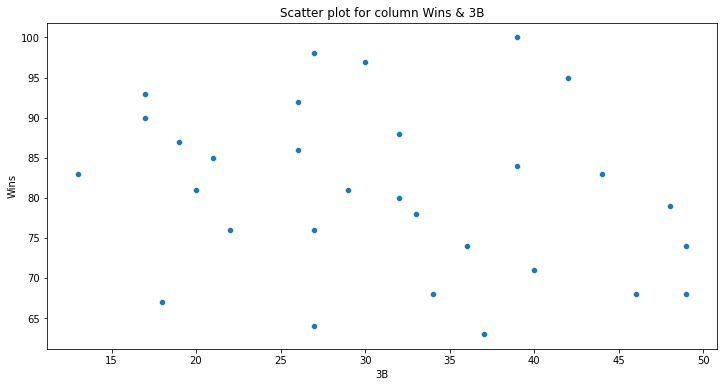

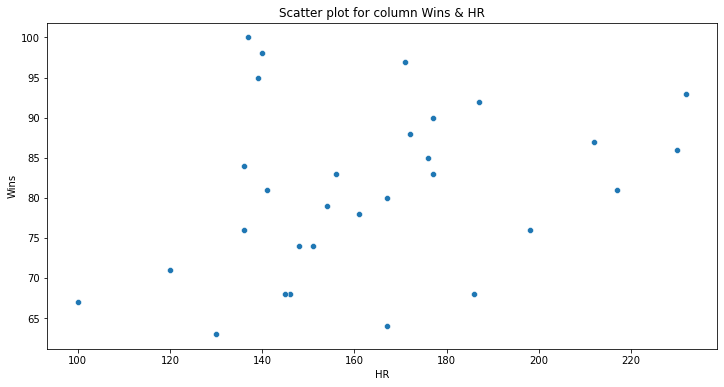

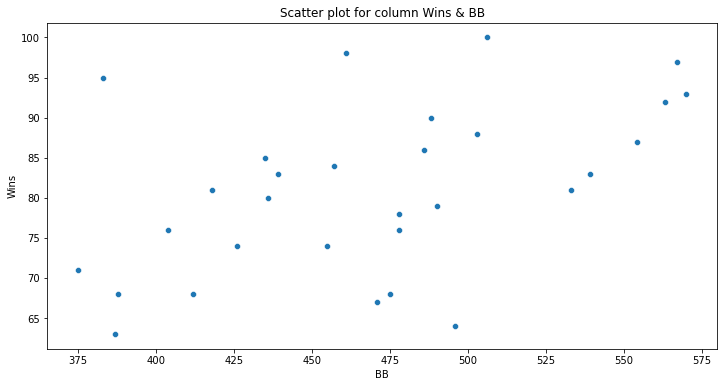

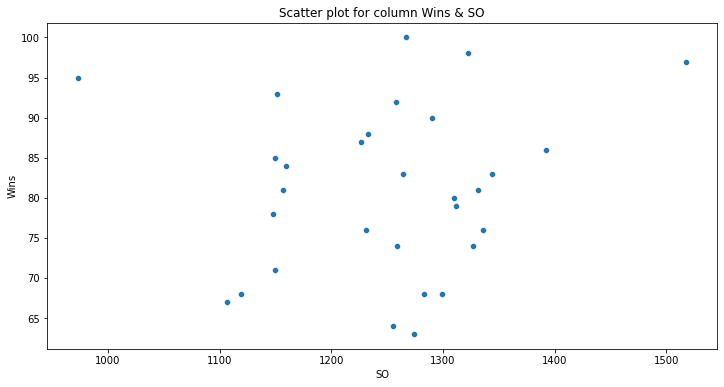

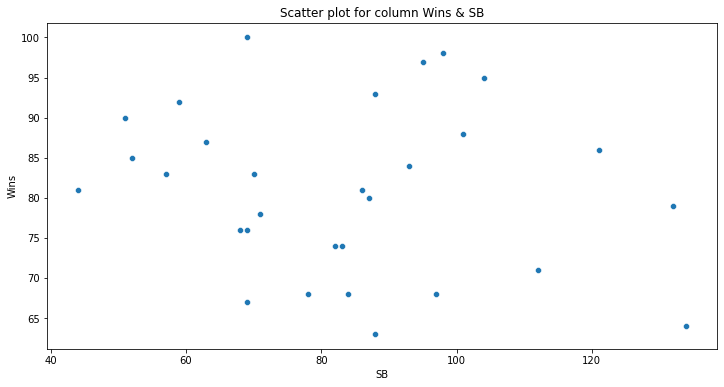

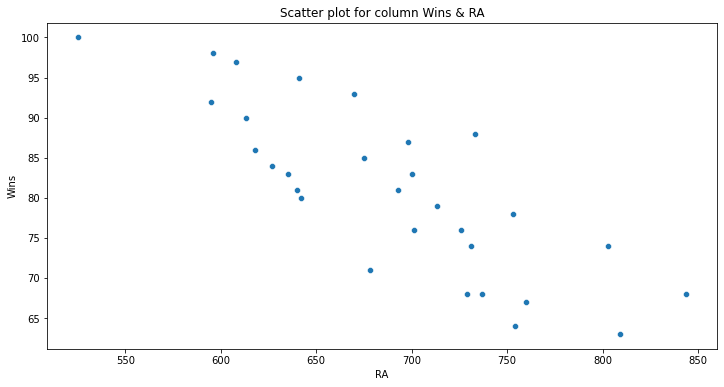

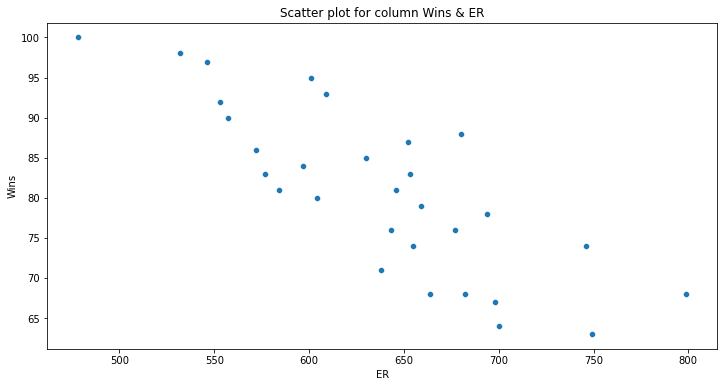

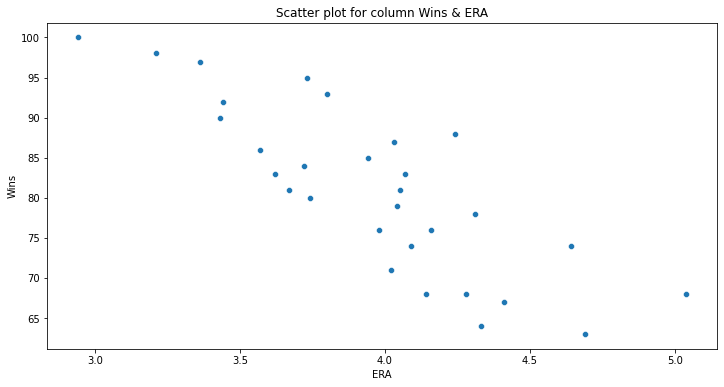

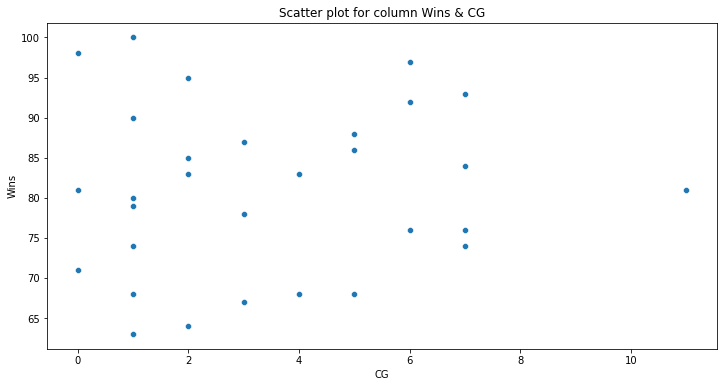

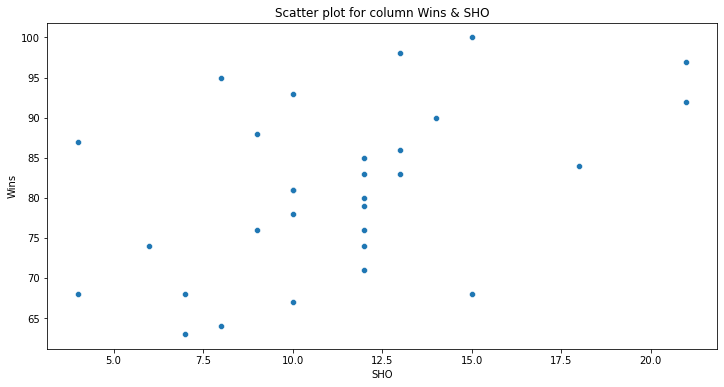

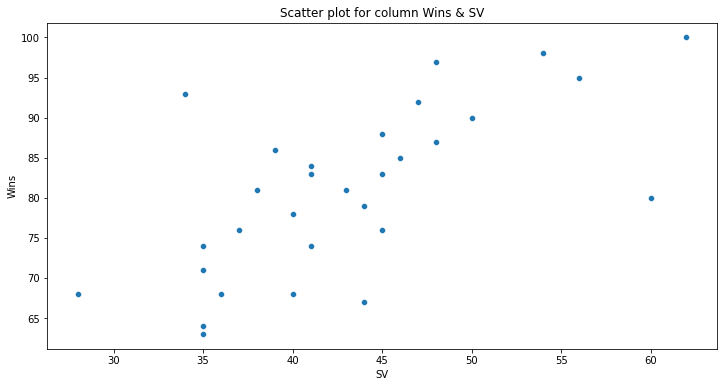

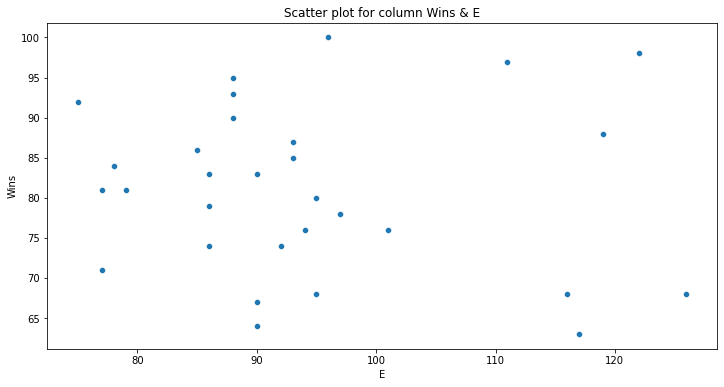

In [34]:
for x in ds.columns.drop('W'):
    scatterbi(x)

As from bivariate analysis visualization we can see that there are some negative, positive correlation 

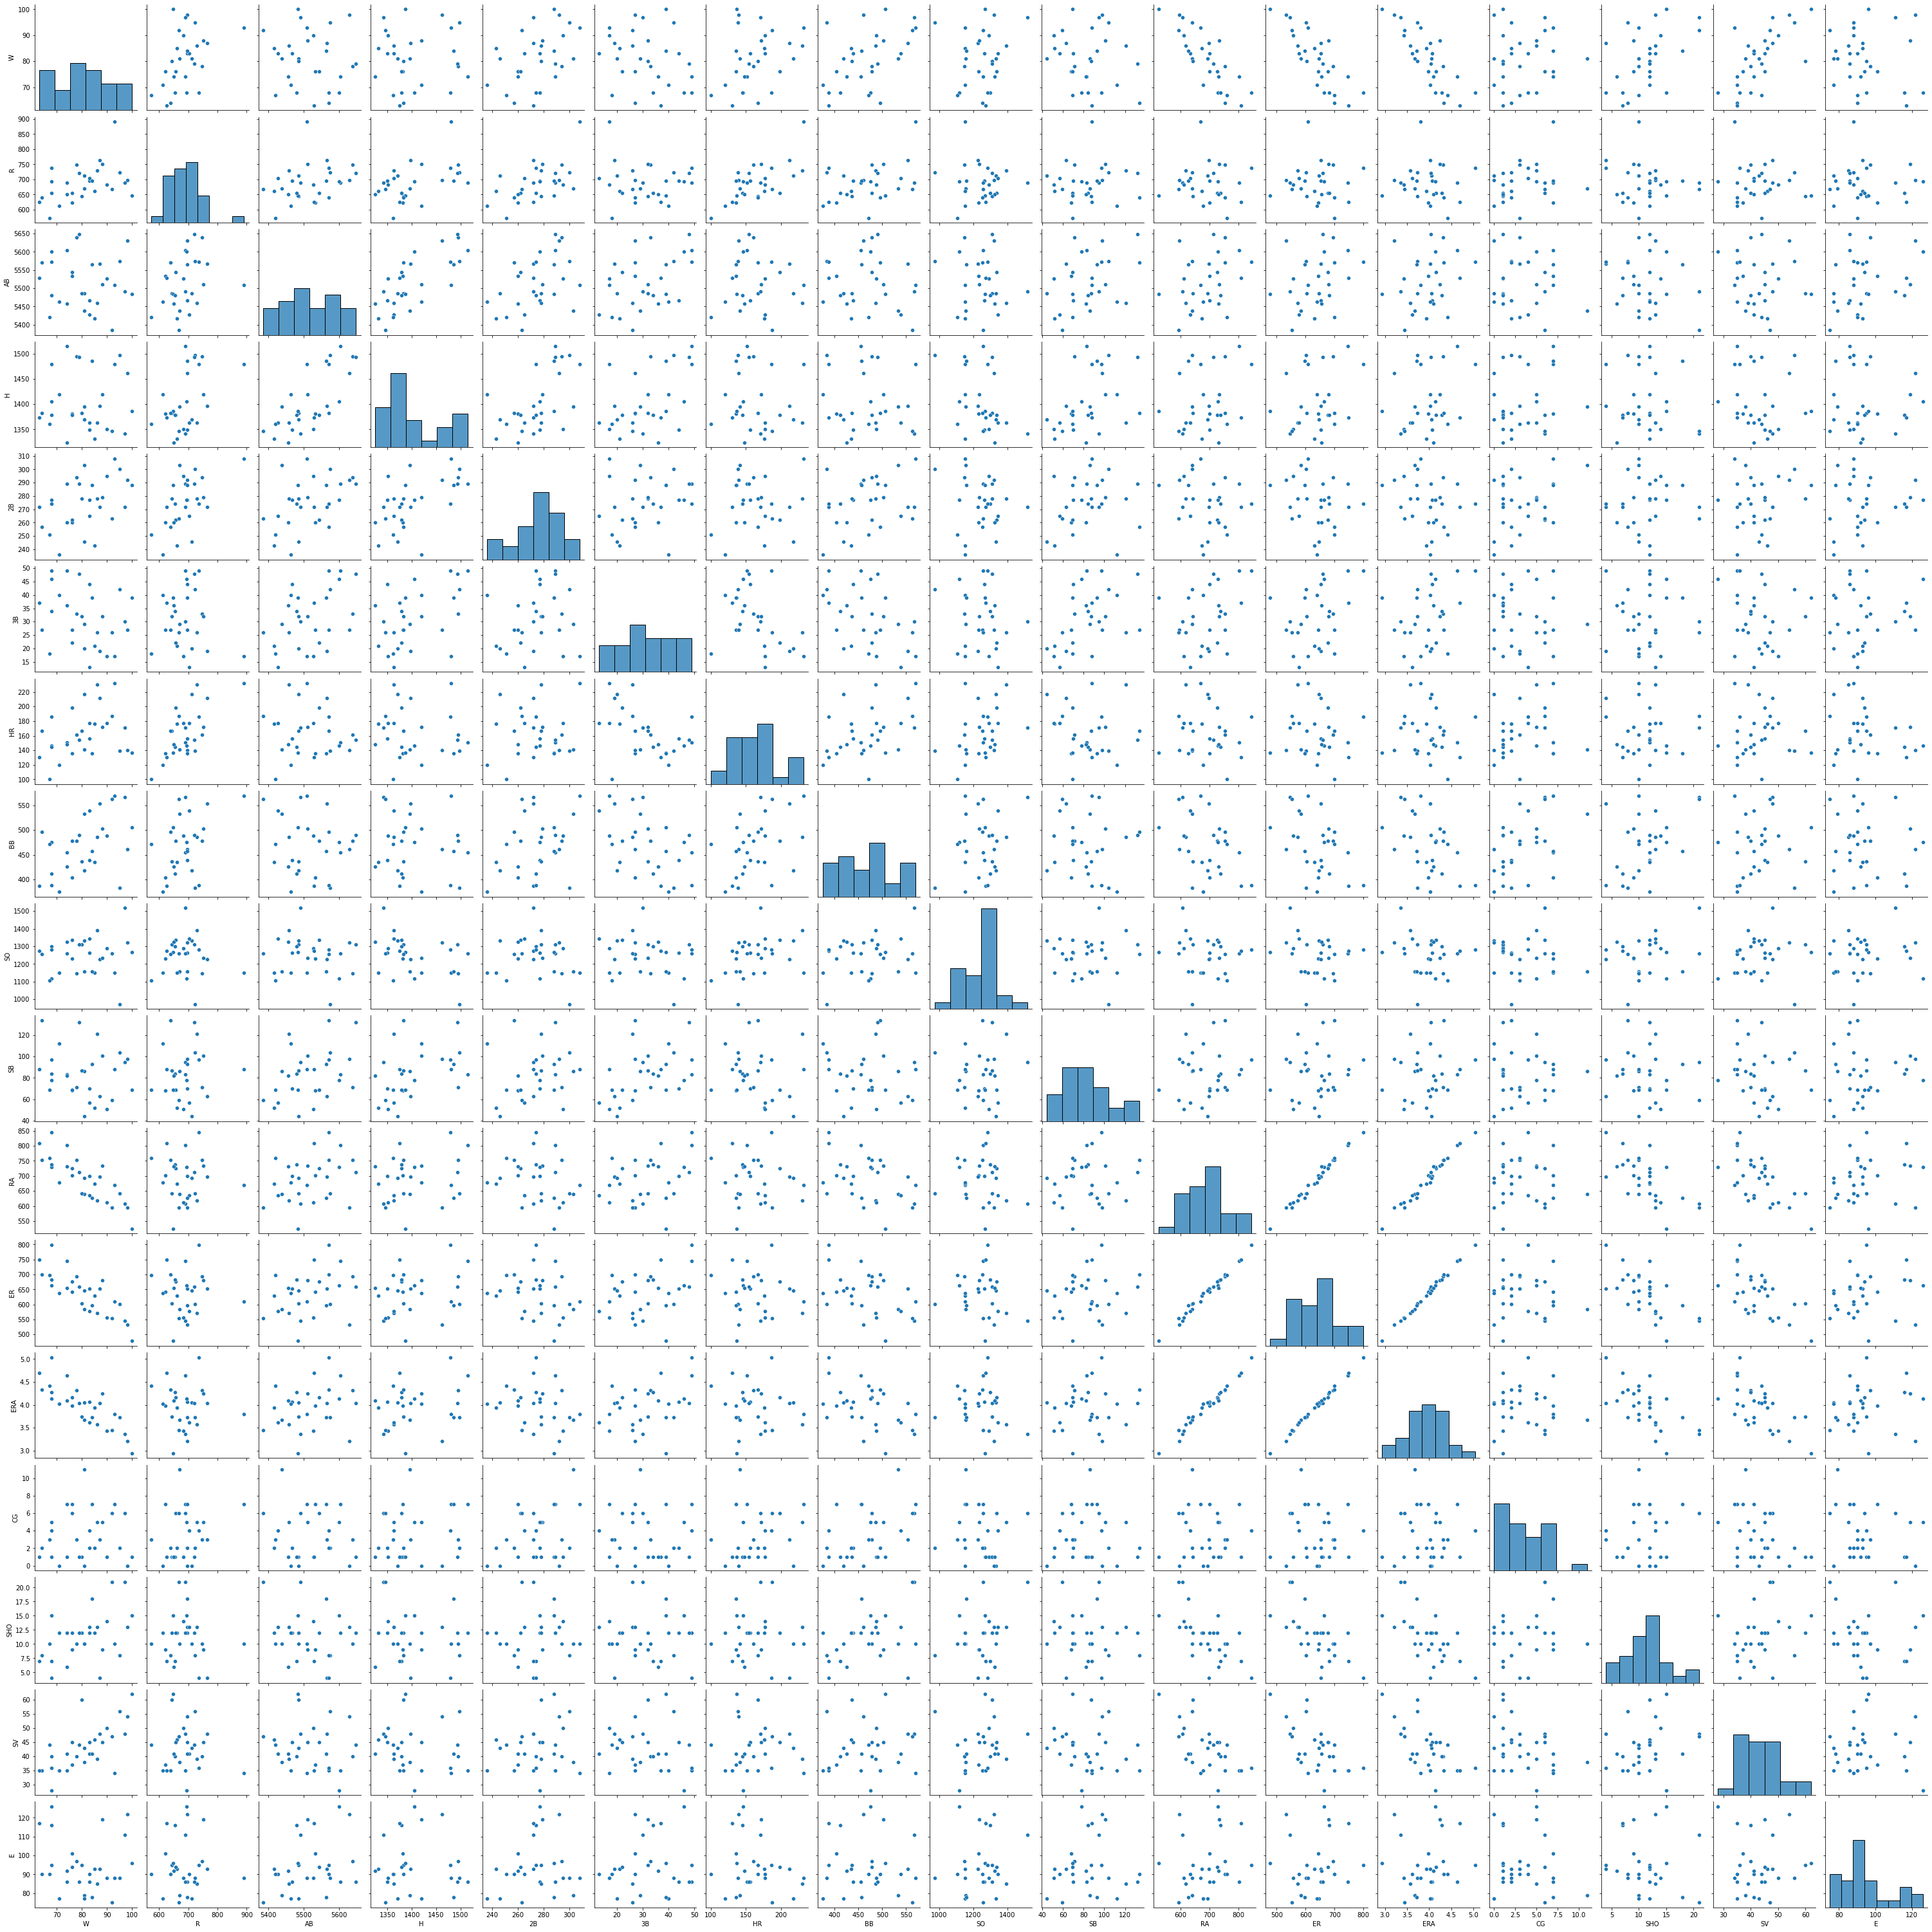

In [35]:
sns.pairplot(ds)

from above we can see Negative, Positive and No correlation of data with all the respective columns

In [36]:
ds.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


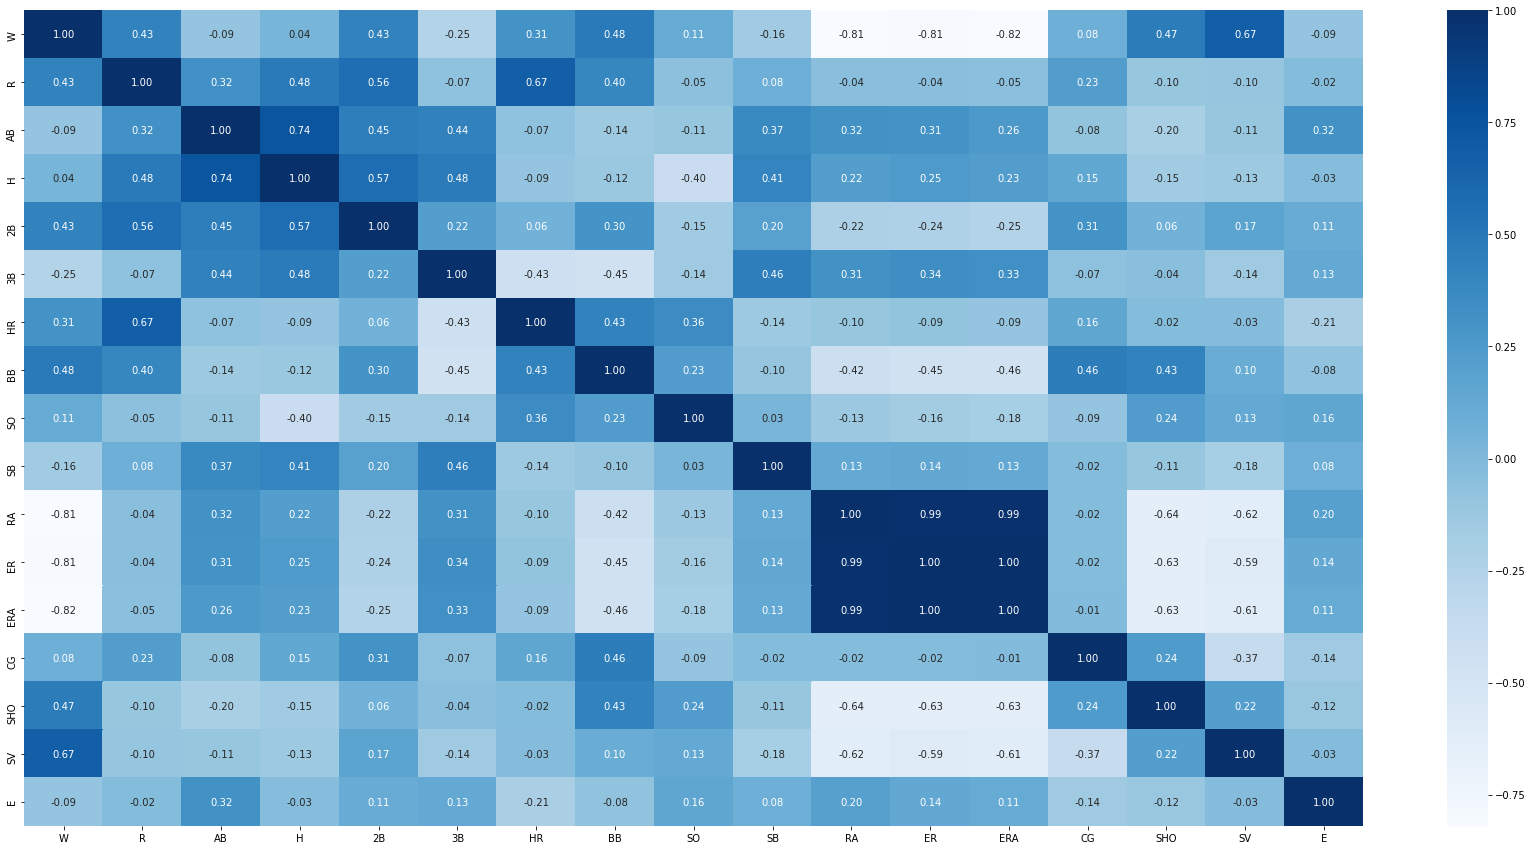

In [37]:
plt.figure(figsize = (30,15))
sns.heatmap(ds.corr(), cmap = 'Blues', annot = True, fmt = '.2f')

lets now see if there are any outliers in the dataset by using boxplot

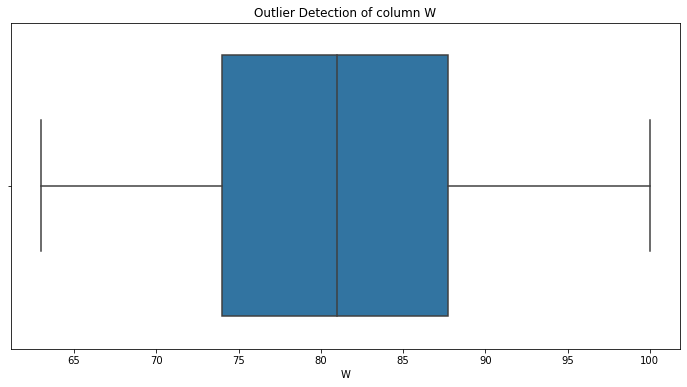

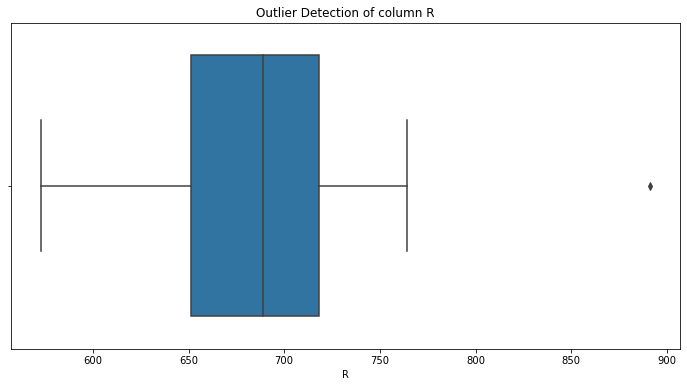

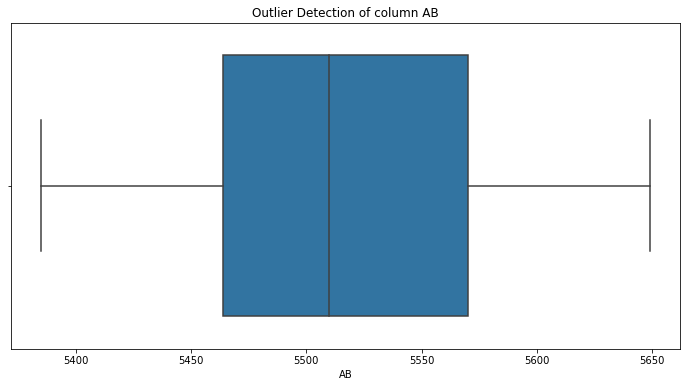

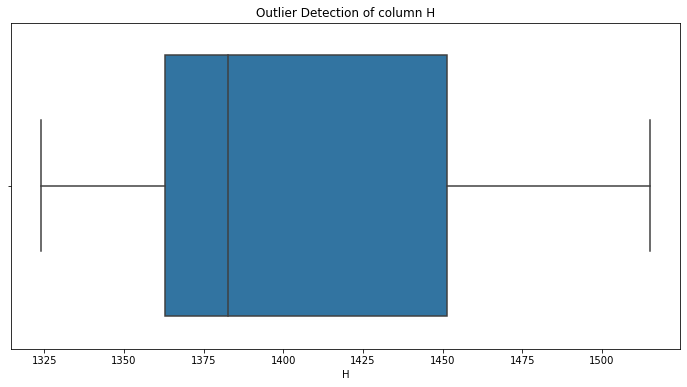

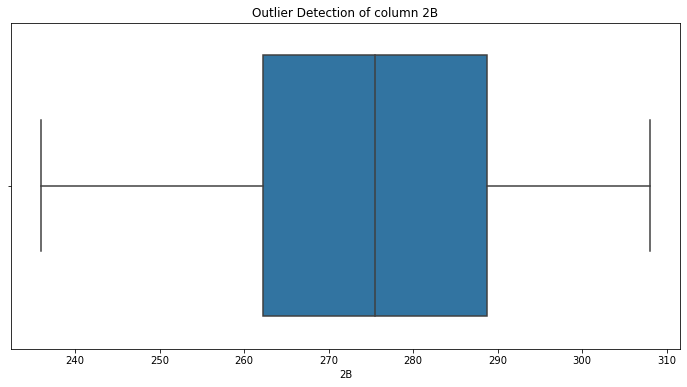

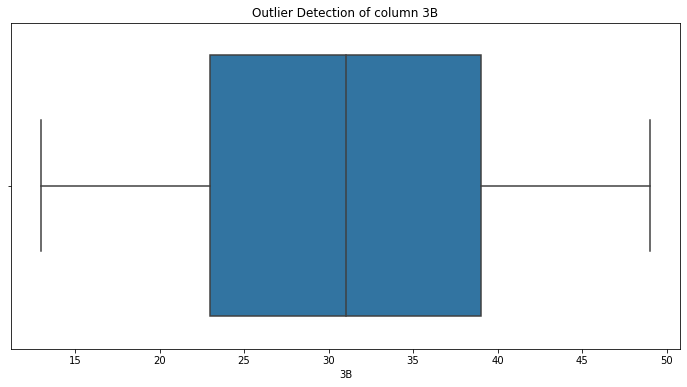

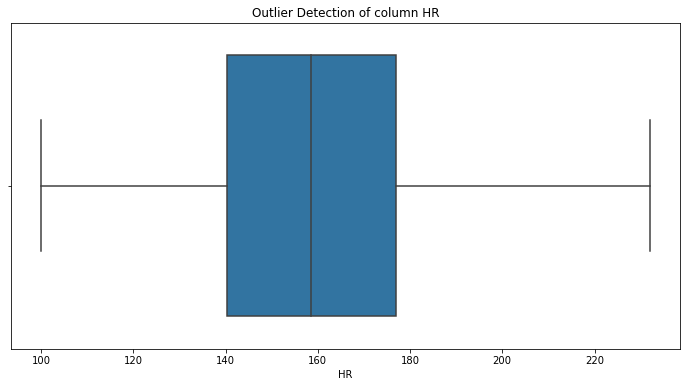

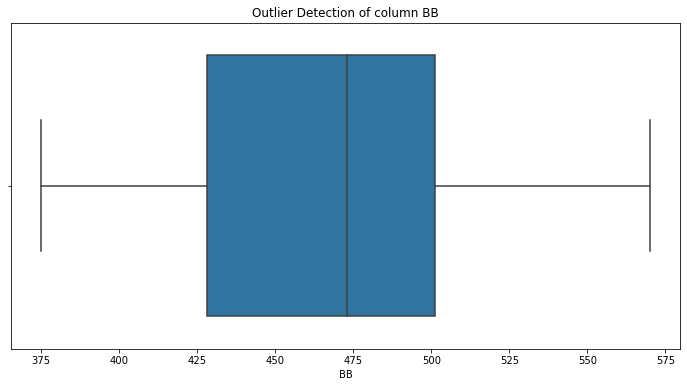

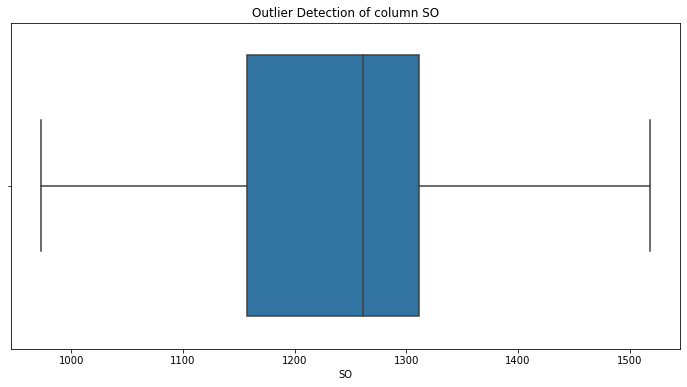

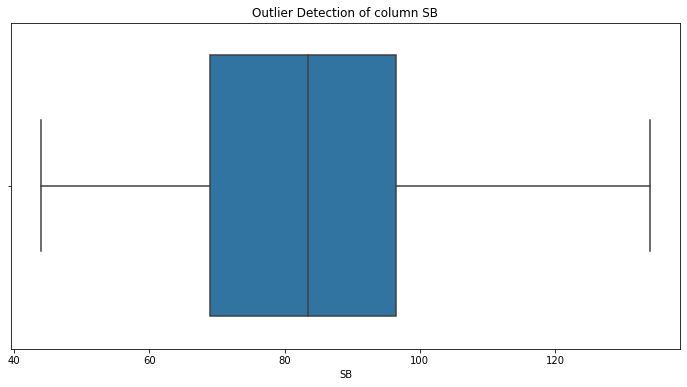

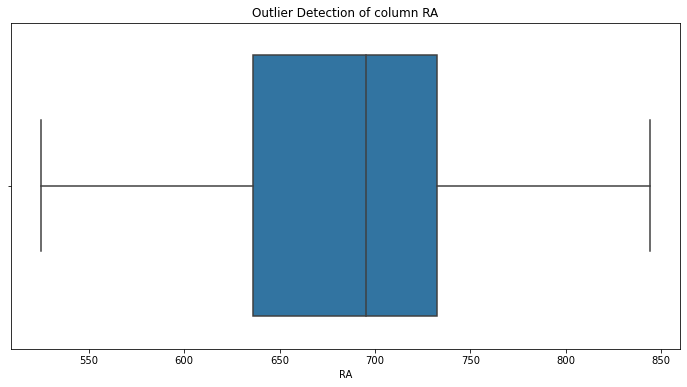

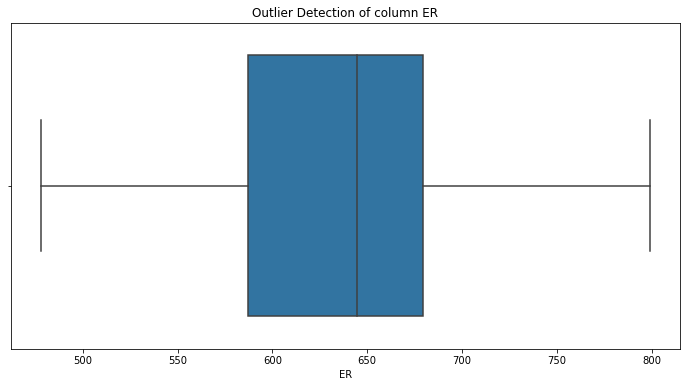

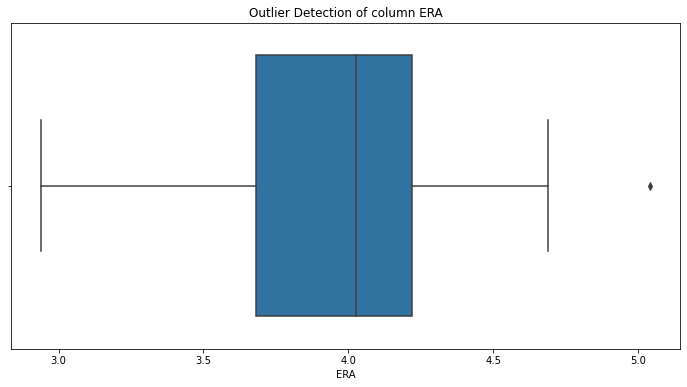

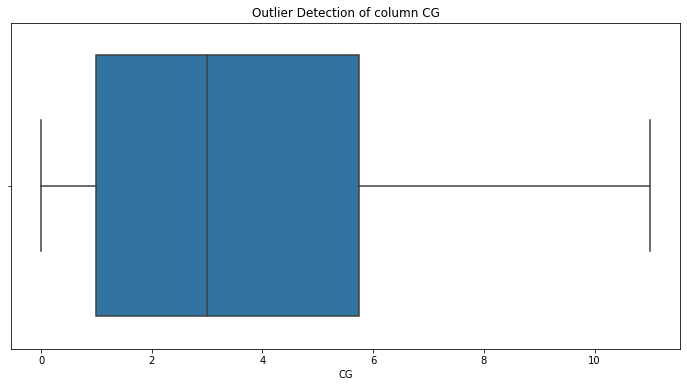

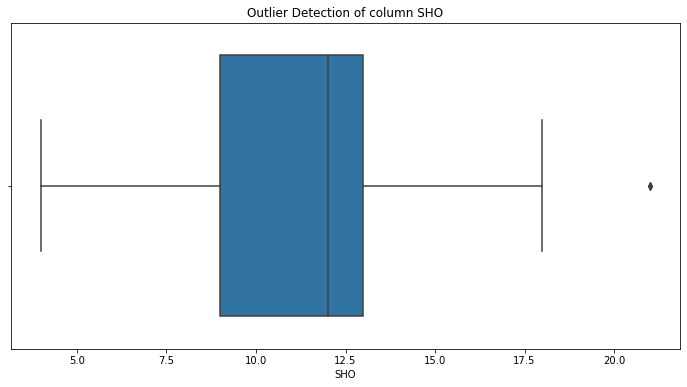

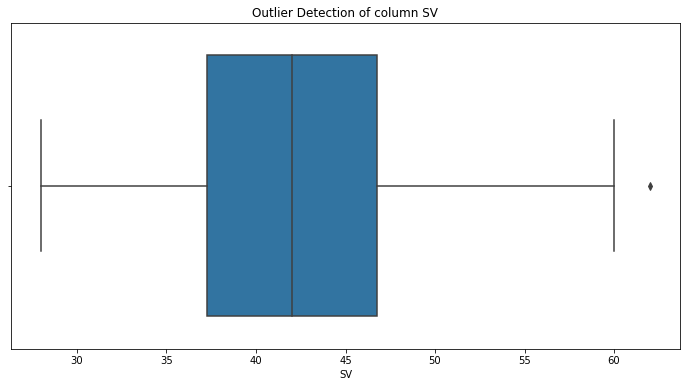

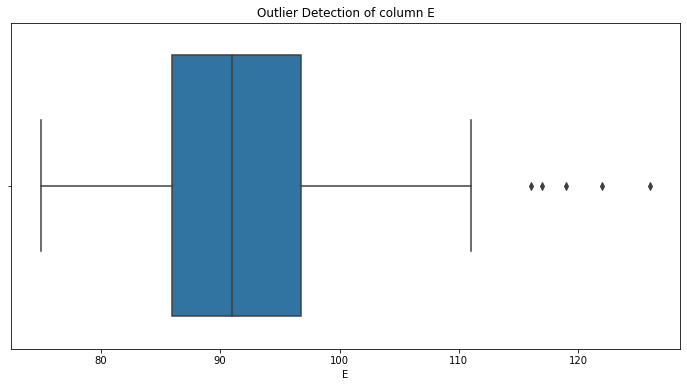

In [38]:
for x in ds.columns:
    plt.figure(figsize = (12,6))
    plt.title("Outlier Detection of column {}".format(x))
    sns.boxplot(ds[x])

from above we can see that there is 1 outlier in Runs column

There is 1 outlier in Earned Run Average

There is also 1 outlier in Shoutouts

There is 1 outlier in Saves

And in Errors there are 5 outliers in Error column

So as we know that there are outliers in the datset lets not fixit using zscore method

In [39]:
zscr = np.abs(zscore(ds))
threshold = 3
print(np.where(zscr>3))

(array([5]), array([1]))


In [40]:
print("Shape before removing the outlier", ds.shape)

dsnew = ds[(zscr<3).all(axis=1)]

print("Shape after removing the outlier", dsnew.shape)

Shape before removing the outlier (30, 17)
Shape after removing the outlier (29, 17)


So we have removed the outlier from dataset and saved it in dsnew not lets see how much dataloss has been taken place if we use dsnew if it is less than 6% we will go with it

In [41]:
100-29/30*100

3.3333333333333286

there is only 3.33% total data loss so we can use the new dataset

now lets convert out new dataset to our old dataset ds

In [42]:
ds = dsnew

now lets see if there is a skewness in our data if it is present we will fix it using power_transformation using yeo-johnson method

we will see the skewness using ds.skew to see the skew here we will take threshold of skewness as +/-0.5

In [43]:
ds.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

so now we can transform the column which has more than +/-0.5 skewness

lets now visualize the skewness using density plot

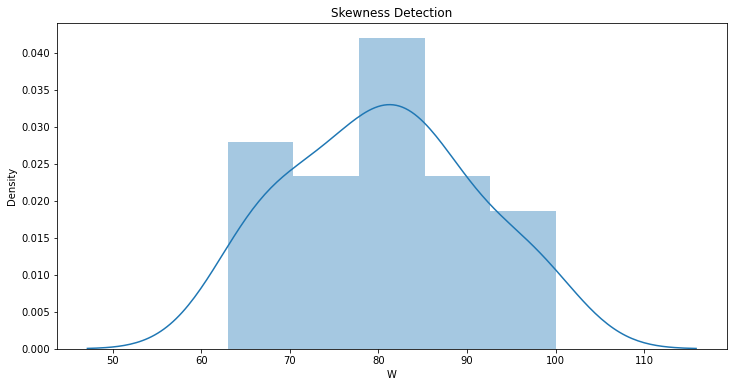

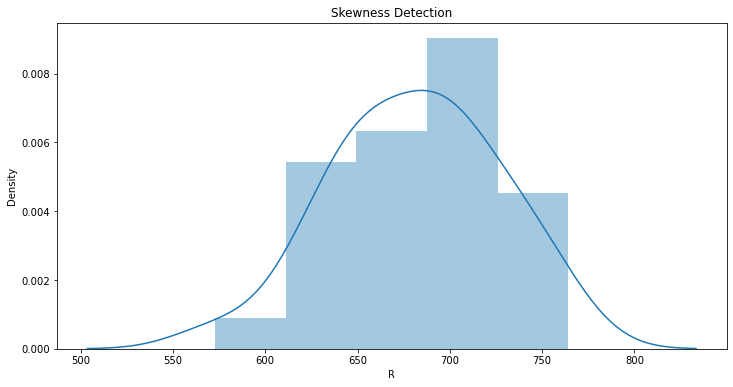

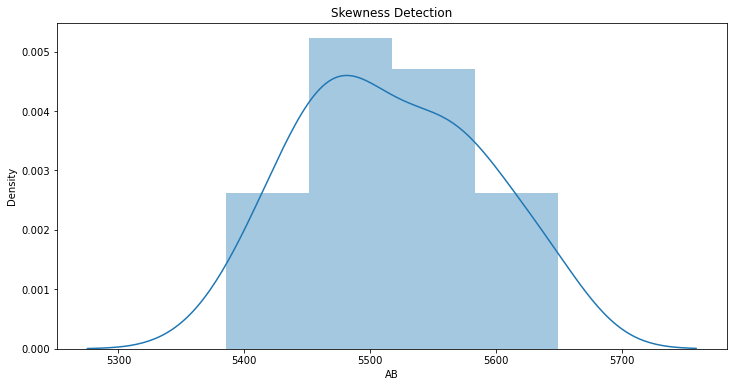

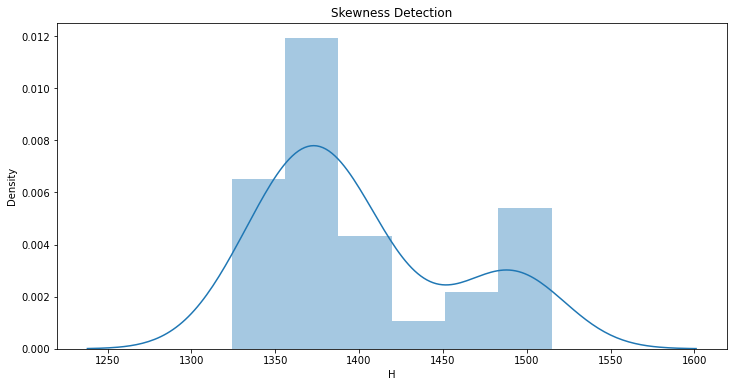

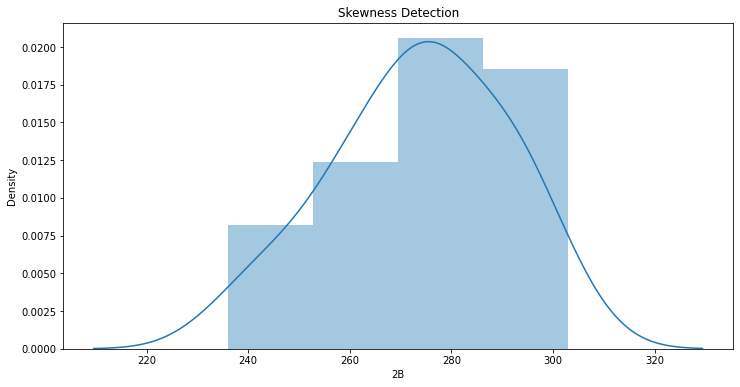

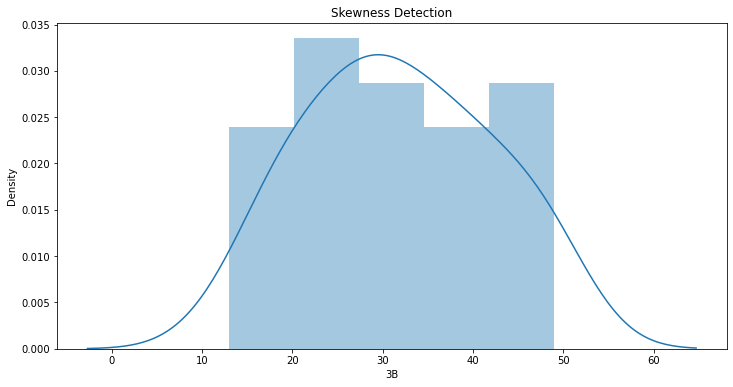

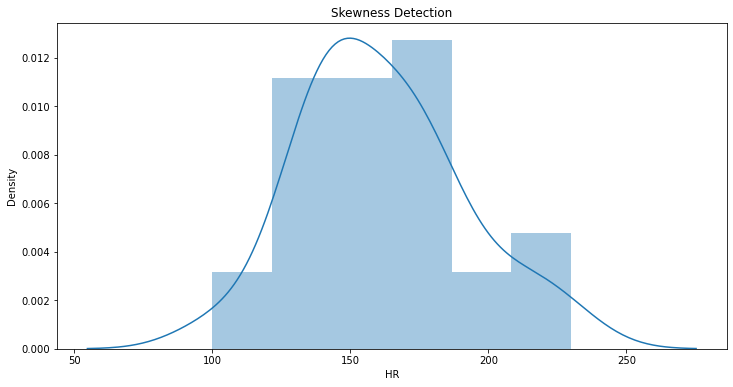

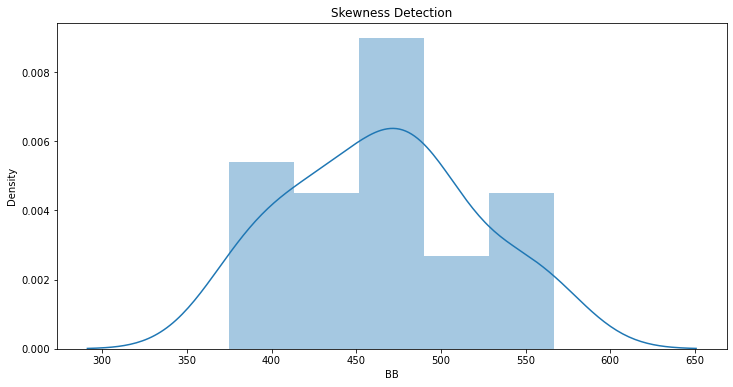

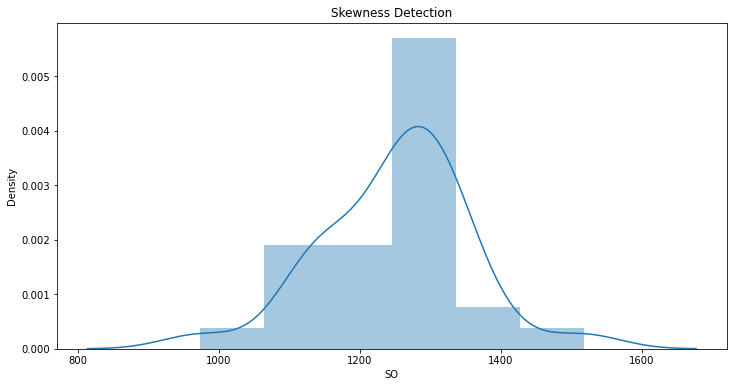

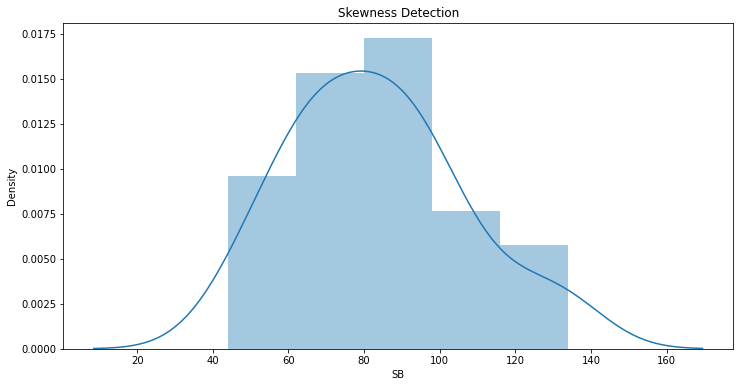

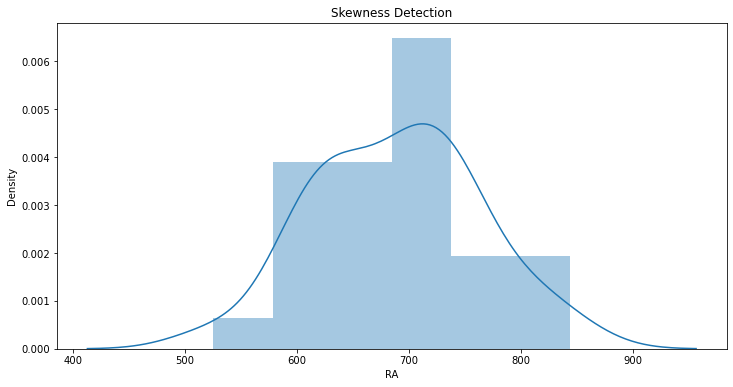

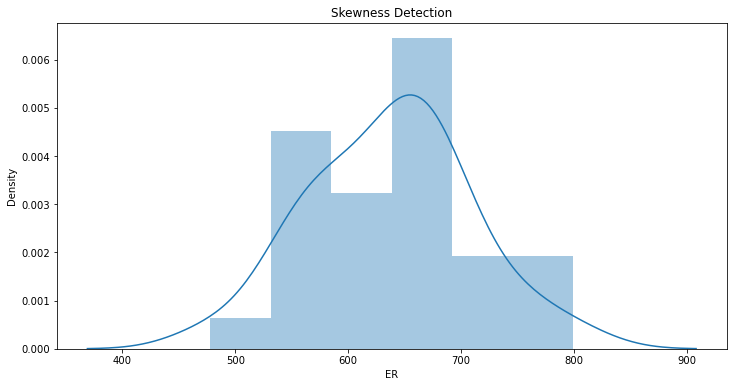

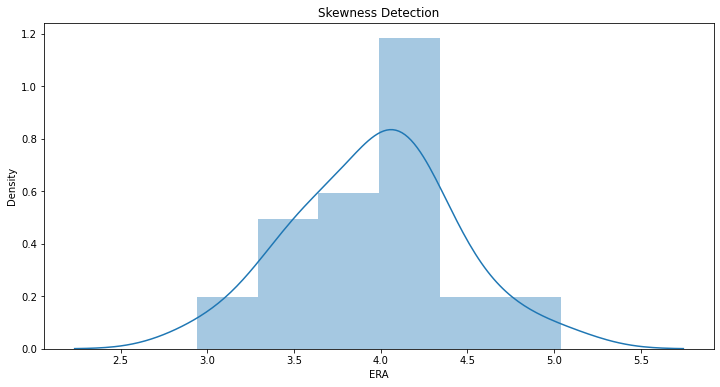

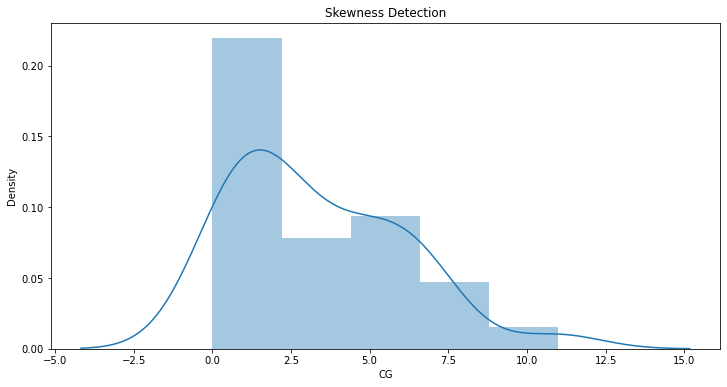

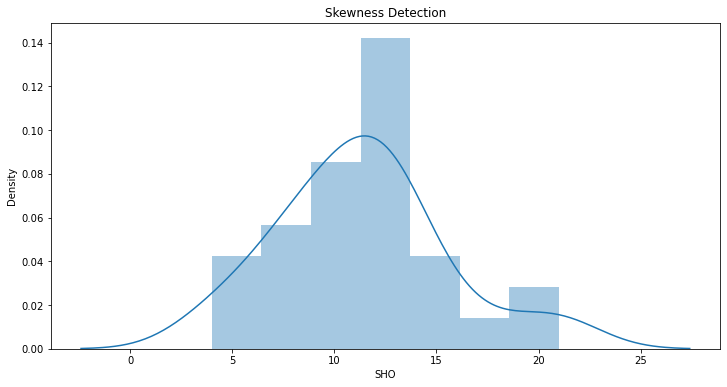

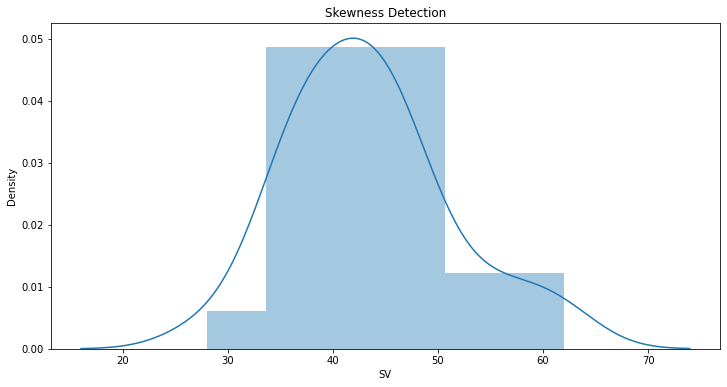

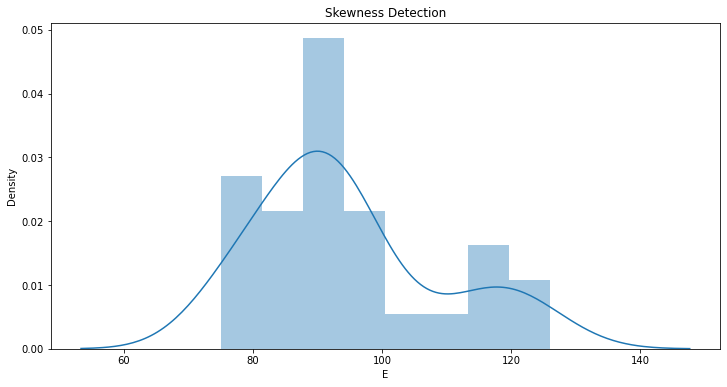

In [44]:
for x in ds.columns:
    plt.figure(figsize = (12,6))
    plt.title("Skewness Detection")
    sns.distplot(ds[x])

from above visualization we can see that there are positive and negative skewness in the dataset

so now lets fix the skewness using power_transform

In [45]:
ds.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [46]:
columns = ['CG','SHO','SV','E']

In [47]:
ds[columns] = power_transform(ds[columns])
ds.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

from above we can see that we have fixed the skewness in the dataset now let us visualize the same

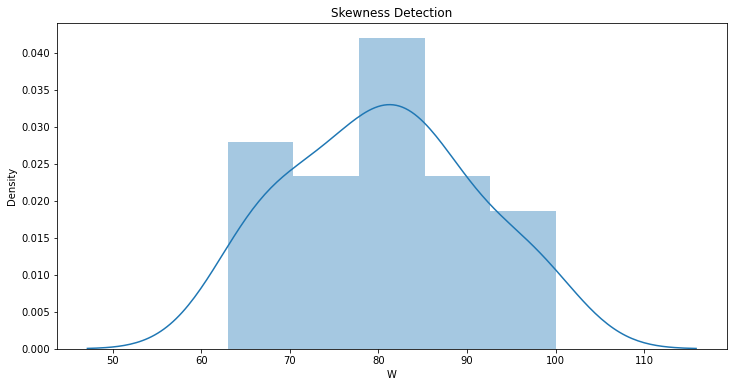

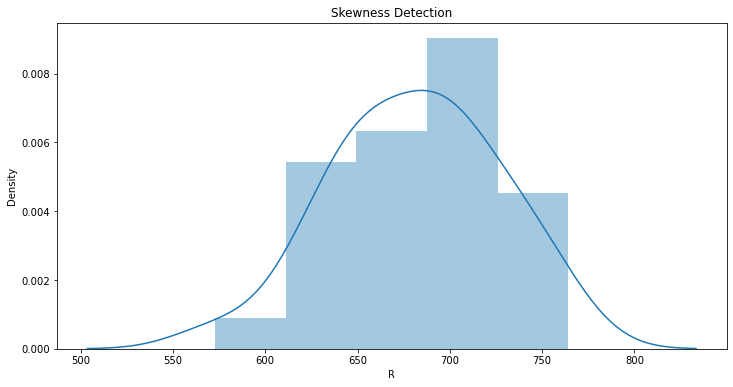

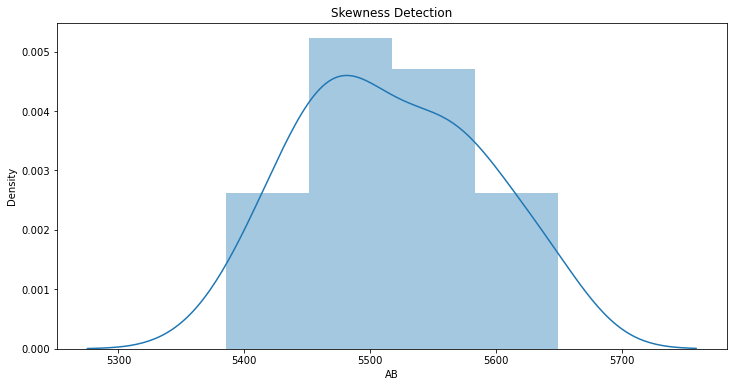

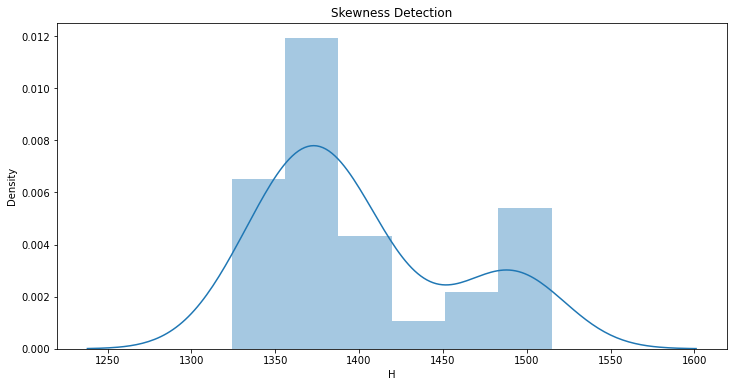

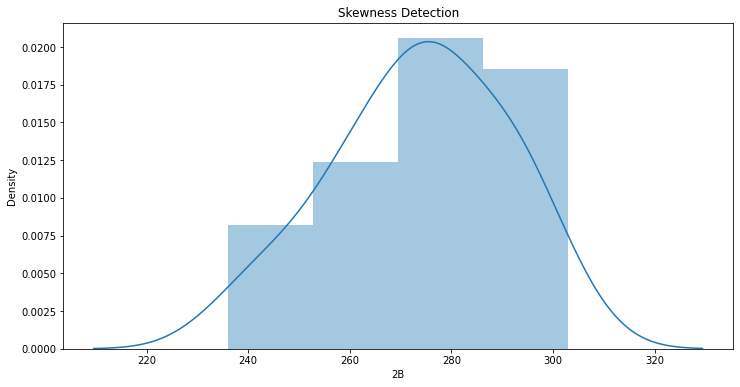

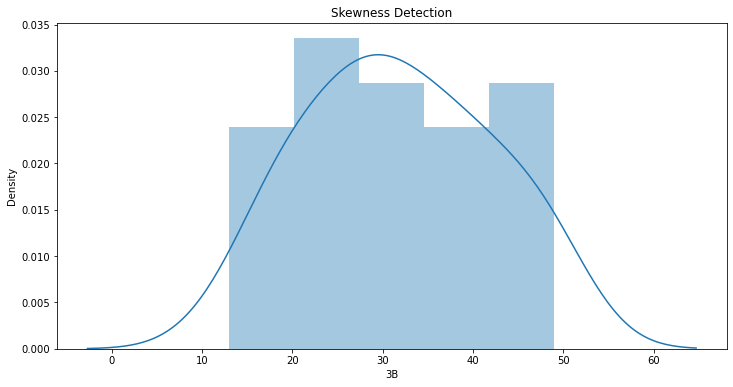

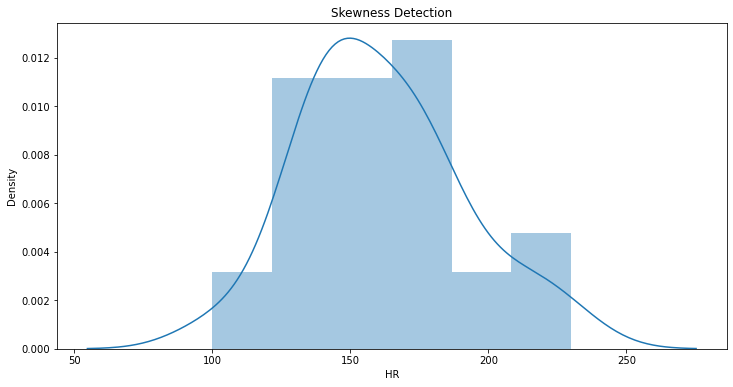

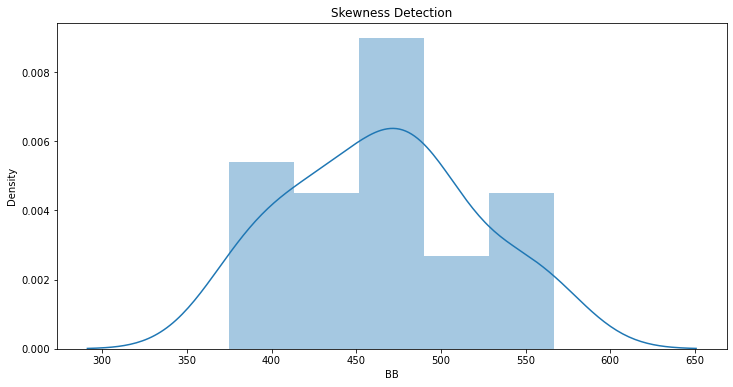

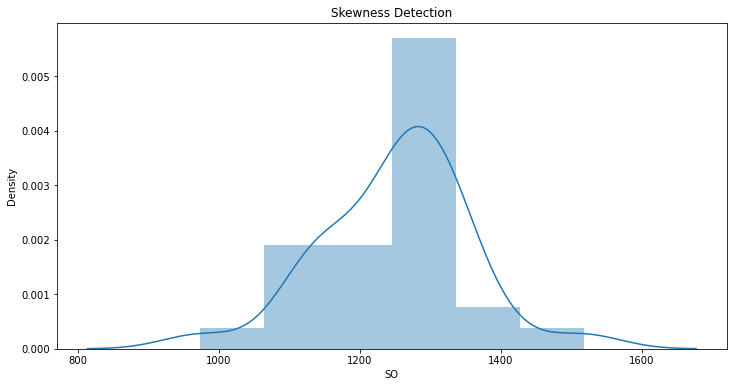

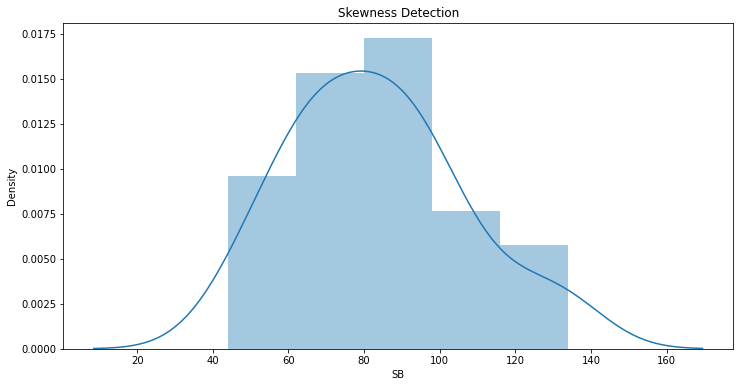

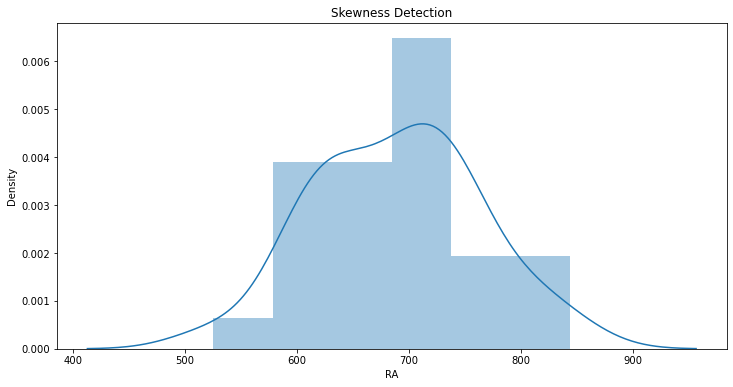

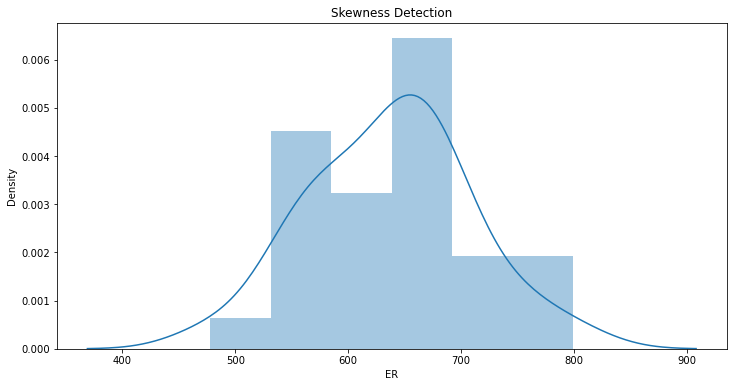

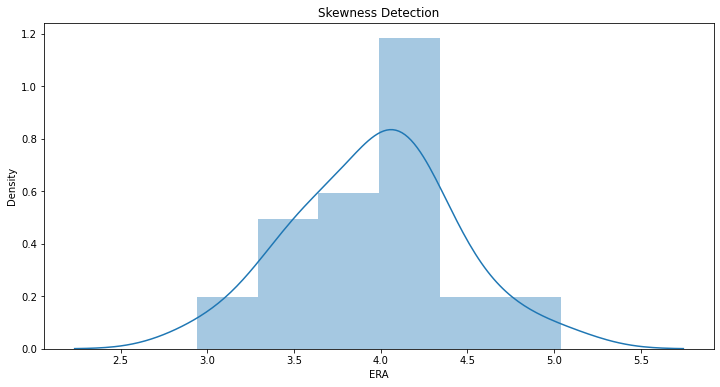

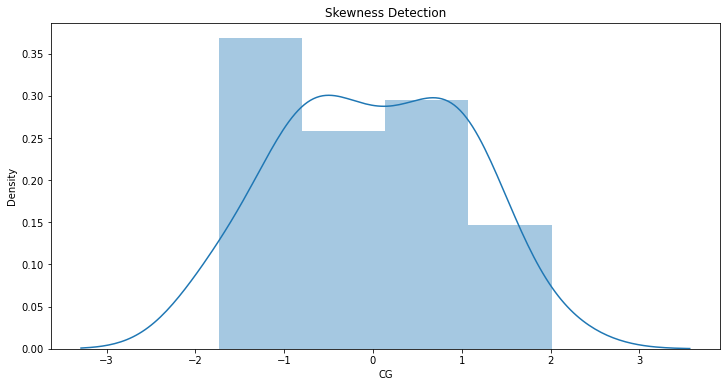

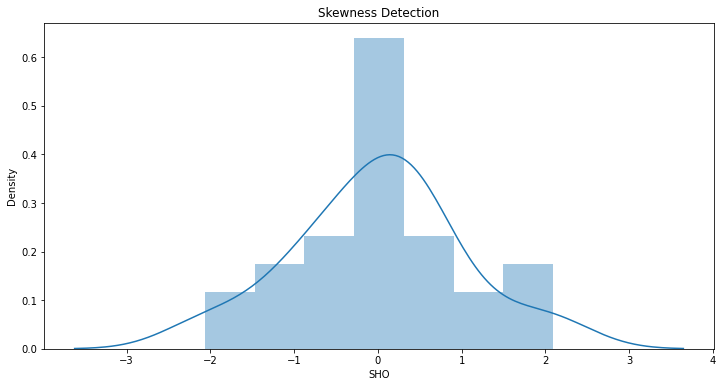

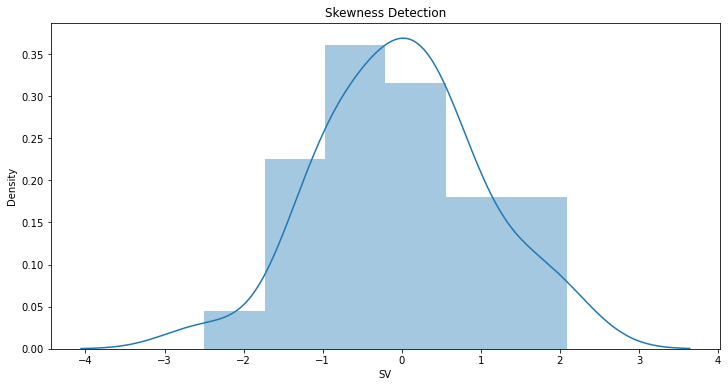

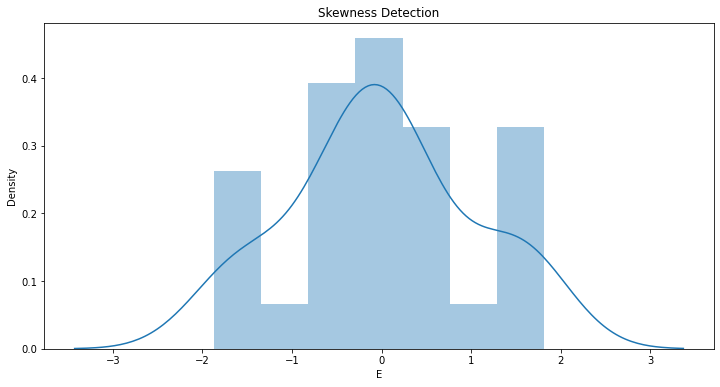

In [48]:
for x in ds.columns:
    plt.figure(figsize = (12,6))
    plt.title("Skewness Detection")
    sns.distplot(ds[x])

We dont need encoding and PCA here as there are no Categorical Variable and nor there are more number of columns for PCA

Now lets seperate independent and dependent variable 

In [49]:
X = ds.drop(['W'], axis = 1)
Y = ds['W']

In [50]:
print(X.shape)
print(Y.shape)

(29, 16)
(29,)


So we can see that we have seperated the dependent and independent variable

now lets scale the independent variable using Standard Scaler

In [51]:
sc = StandardScaler()

In [52]:
Xnew = sc.fit_transform(X)

In [53]:
Xnew  = pd.DataFrame(Xnew, columns = X.columns)

In [54]:
Xnew.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.738306,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.307098,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,-0.938698,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.307098,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,-0.106656,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,2.011315,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.359886,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.264463,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,2.063888,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.264463,0.236737,-1.149165,-0.540820


from above we can see that we have scaled the data now lets split the variable into traning and testing using train_test_split

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

Now we are using random_state as 42 later we will see the best random state and use that random state for all the models

In [56]:
model = [LinearRegression(), Lasso(), Ridge(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor(), SVR(), KNeighborsRegressor()]

In [57]:
maxacc = 0
maxrs = 0
n = 0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = i)
    for m in model:
        m.fit(X_train, Y_train)
        pred = m.predict(X_test)
        acc = r2_score(Y_test, pred)
        if acc > maxacc:
            maxacc = acc
            maxrs = i
            n = m
print("Maximum Accuracy is {} at Random State {} for model {}".format(maxacc, maxrs, n))

Maximum Accuracy is 0.9558024976411889 at Random State 297 for model Lasso()


so from above we can see that highest accuracy score is 96% and Random State is 297 lets use this random state for all the models and compare there accuracy score

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = 297)

In [59]:
print("Linear Regression")
lr = LinearRegression()
lr.fit(X_train, Y_train)
predlr = lr.predict(X_test)
acclr  = r2_score(Y_test, predlr)*100
print("Accuracy Score:", acclr)
print("Mean Squared Error:", mean_squared_error(Y_test, predlr))
print("Abosulte Mean Squared Error:", mean_absolute_error(Y_test, predlr))
scorelr = cross_val_score(lr, X, Y, cv = 5)
scorelr = scorelr.mean()*100
print("After Cross Validation Score",scorelr)

Linear Regression
Accuracy Score: 46.470686753619574
Mean Squared Error: 90.36622023960386
Abosulte Mean Squared Error: 8.109691143616583
After Cross Validation Score 4.571935186656564


In [60]:
print("Lasso")
lasso = Lasso()
lasso.fit(X_train, Y_train)
predlass = lasso.predict(X_test)
acclass = r2_score(Y_test, predlass)*100
print("Accuracy Score:", acclass)
print("Mean Squared Error:", mean_squared_error(Y_test, predlass))
print("Mean Absolute Error:", mean_absolute_error(Y_test, predlass))
scorelass = cross_val_score(lasso, X, Y, cv = 5 )
scorelass = scorelass.mean()*100
print("After Cross Validation Score:", scorelass)

Lasso
Accuracy Score: 95.58024976411889
Mean Squared Error: 7.461259990042571
Mean Absolute Error: 2.370713356484299
After Cross Validation Score: 27.656487600724706


In [61]:
print("Ridge")
ridge = Ridge()
ridge.fit(X_train, Y_train)
predreg = ridge.predict(X_test)
accreg = r2_score(Y_test, predreg)*100
print("Accuracy Score", accreg)
print("Mean Squared Error:", mean_squared_error(Y_test, predreg))
print("Mean Absolute Error:", mean_absolute_error(Y_test, predreg))
scorereg = cross_val_score(ridge, X, Y, cv = 5)
scorereg = scorereg.mean()*100
print("After Cross Validation:", scorereg)

Ridge
Accuracy Score 61.974067030984
Mean Squared Error: 64.1939831672858
Mean Absolute Error: 6.70336383611738
After Cross Validation: 34.601835202702134


In [62]:
print("Decision Tree")
dtr = DecisionTreeRegressor()
dtr.fit(X_train, Y_train)
predtr = dtr.predict(X_test)
accdtr = r2_score(Y_test, predtr)*100
print("Accuracy Score:", accdtr)
print("Mean Squared Error:", mean_squared_error(Y_test, predtr))
print("Mean absolute Error:", mean_absolute_error(Y_test, predtr))
scoredtr = cross_val_score(dtr ,X, Y, cv = 5)
scoredtr = scoredtr.mean()*100
print("After Cross Validation:", scoredtr)

Decision Tree
Accuracy Score: 66.74323017408123
Mean Squared Error: 56.142857142857146
Mean absolute Error: 6.142857142857143
After Cross Validation: -219.81432932281342


In [63]:
print("Random Forest")
rfr = RandomForestRegressor()
rfr.fit(X_train , Y_train)
predrfr = rfr.predict(X_test)
accrfr = r2_score(Y_test, predrfr)*100
print("Accuracy Score", accrfr)
print("Mean Squared Error:", mean_squared_error(Y_test, predrfr))
print("Mean absoulte error:", mean_absolute_error(Y_test, predrfr))
scorerfr = cross_val_score(rfr, X, Y, cv = 5)
scorerfr = scorerfr.mean()*100
print("Score after cross validation:", scorerfr)

Random Forest
Accuracy Score 58.71369197292069
Mean Squared Error: 69.6980285714286
Mean absoulte error: 6.845714285714286
Score after cross validation: -59.73764582522397


In [64]:
print("Adaboost. Regressor")
adb = AdaBoostRegressor()
adb.fit(X_train , Y_train)
predadb = adb.predict(X_test)
accadb = r2_score(Y_test, predadb)*100
print("Accuracy Score", accadb)
print("Mean Squared Error:", mean_squared_error(Y_test, predadb))
print("Mean absoulte error:", mean_absolute_error(Y_test, predadb))
scoreadb = cross_val_score(adb, X, Y, cv = 5)
scoreadb = scoreadb.mean()*100
print("Score after cross validation:", scoreadb)

Adaboost. Regressor
Accuracy Score 64.60206117021276
Mean Squared Error: 59.7575
Mean absoulte error: 6.721428571428571
Score after cross validation: -89.88173314487442


In [65]:
print("SVR")
svr = SVR()
svr.fit(X_train , Y_train)
predsvr = svr.predict(X_test)
accsvr = r2_score(Y_test, predsvr)*100
print("Accuracy Score", accsvr)
print("Mean Squared Error:", mean_squared_error(Y_test, predsvr))
print("Mean absoulte error:", mean_absolute_error(Y_test, predsvr))
scoresvr = cross_val_score(svr, X, Y, cv = 5)
scoresvr = scoresvr.mean()*100
print("Score after cross validation:", scoresvr)

SVR
Accuracy Score -2.3243712059138
Mean Squared Error: 172.7402446153712
Mean absoulte error: 11.202482686106652
Score after cross validation: -42.87412846715023


In [66]:
print('KNeighborsRegressor')
knn = KNeighborsRegressor()
knn.fit(X_train , Y_train)
predknn = knn.predict(X_test)
accknn = r2_score(Y_test, predknn)*100
print("Accuracy Score", accknn)
print("Mean Squared Error:", mean_squared_error(Y_test, predknn))
print("Mean absoulte error:", mean_absolute_error(Y_test, predknn))
scoreknn = cross_val_score(knn, X, Y, cv = 5)
scoreknn = scoresvr.mean()
print("Score after cross validation:", scoreknn)

KNeighborsRegressor
Accuracy Score 50.813829787234035
Mean Squared Error: 83.03428571428573
Mean absoulte error: 8.714285714285714
Score after cross validation: -42.87412846715023


as we have calculated all the accuracy score and cross validation score of all the models lets now save it and view so that we can find the best model

In [67]:
diff = {
    'Model Name':['Linear Regression','Lasso','Ridge','Decision Tree','Random Forest','Adaboost','SVR', 'KNeighbors Regressor'],
    'Accuracy Score' : [acclr, acclass, accreg, accdtr, accrfr, accadb, accsvr, accknn],
    'Cross Validation Score': [scorelr, scorelass, scorereg, scoredtr, scorerfr, scoreadb, scoresvr, scoreknn],
    'Accuracy Score - Cross Validation Score': [acclr-scorelr, acclass-scorelass, accreg-scorereg,accdtr-scoredtr, accrfr-scorerfr, accadb-scoreadb, accsvr-scoresvr, accknn-scoreknn]
}

as we have all the values of all the models we will use this to choose our best model

In [68]:
difference = pd.DataFrame.from_dict(diff)

In [69]:
difference

,Model Name,Accuracy Score,Cross Validation Score,Accuracy Score - Cross Validation Score
0,Linear Regression,46.470687,4.571935,41.898752
1,Lasso,95.580250,27.656488,67.923762
2,Ridge,61.974067,34.601835,27.372232
3,Decision Tree,66.743230,-219.814329,286.557559
4,Random Forest,58.713692,-59.737646,118.451338
5,Adaboost,64.602061,-89.881733,154.483794
6,SVR,-2.324371,-42.874128,40.549757
7,KNeighbors Regressor,50.813830,-42.874128,93.687958


from above we will not be using the models which gave us negative r2_score as they are not good model to be selected

In [70]:
difference.drop(difference.index[[6]], inplace=True)

In [71]:
difference

,Model Name,Accuracy Score,Cross Validation Score,Accuracy Score - Cross Validation Score
0,Linear Regression,46.470687,4.571935,41.898752
1,Lasso,95.580250,27.656488,67.923762
2,Ridge,61.974067,34.601835,27.372232
3,Decision Tree,66.743230,-219.814329,286.557559
4,Random Forest,58.713692,-59.737646,118.451338
5,Adaboost,64.602061,-89.881733,154.483794
7,KNeighbors Regressor,50.813830,-42.874128,93.687958


so form above we can see that Lasso is the best model so we will do GridSearchCV to lasso algorithm and lets see how much we can increase the accuracy score

In [72]:
parameterlass = {
    'alpha':np.arange(1.0,2.0,0.1),
    'selection':['cyclic','random']
}

In [73]:
GSCVlass = GridSearchCV(lasso, parameterlass)
GSCVlass.fit(X_train, Y_train)
GSCV_predictlass = GSCVlass.best_estimator_.predict(X_test)

In [74]:
r2_score(Y_test, GSCV_predictlass)

0.9558072578765487

lets now do it for other algorithms too

In [75]:
parameterknn = {
    'n_neighbors':np.arange(1,10),
    'weights':['uniform','distance'],
    'algorithm':['auto','ball_tree','kd_tree','brute'],
    'n_jobs':np.arange(1,10)
}

In [76]:
GSCVknn = GridSearchCV(knn, parameterknn)
GSCVknn.fit(X_train, Y_train)
GSCV_predictknn = GSCVknn.best_estimator_.predict(X_test)
r2_score(Y_test, GSCV_predictknn)

0.4372560418964896

In [77]:
parameterlr = {
    'n_jobs':np.arange(1,10)
}

In [78]:
parametereg = {
    'alpha':np.arange(1.0,2.0,0.1),
    'max_iter':np.arange(1,10),
    'solver' :['autop', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

In [79]:
GSCVlr = GridSearchCV(lr, parameterlr)
GSCVreg = GridSearchCV(ridge, parametereg)

In [80]:
GSCVlr.fit(X_train, Y_train)
GSCVreg.fit(X_train, Y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]),
                         'max_iter': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'solver': ['autop', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']})

In [81]:
GSCV_predictlr = GSCVlr.best_estimator_.predict(X_test)
GSCV_predictreg = GSCVreg.best_estimator_.predict(X_test)

In [82]:
r2_score(Y_test, GSCV_predictlr)

0.4647068675361957

In [83]:
r2_score(Y_test, GSCV_predictreg)

0.8978224608108293

In [84]:
GSCV_predictreg

array([64.46314139, 88.39705623, 98.14312792, 90.48978326, 60.85169905,
       80.1769941 , 70.10298511])

In [85]:
GSCV_predictlass

array([65.75596462, 84.84587338, 99.33310257, 89.84054355, 60.09908807,
       79.08783984, 66.86466266])

As from above we can see that Ridge Regression has the heighest Accuracy We will save Ridge as our best model

In [86]:
print("Lasso Regression Performance Metrics")
print("Accuracy Score:", r2_score(Y_test, GSCV_predictlass))
print("Mean Squared Error:",mean_squared_error(Y_test, GSCV_predictlass))
print("Mean Absolute Error:", mean_absolute_error(Y_test, GSCV_predictlass))

Lasso Regression Performance Metrics
Accuracy Score: 0.9558072578765487
Mean Squared Error: 7.460456384595699
Mean Absolute Error: 2.370571055680238


In [87]:
print("Ridge Regression Performance Metrics")
print("Accuracy Score:", r2_score(Y_test, GSCV_predictreg))
print("Mean Squared Error:",mean_squared_error(Y_test, GSCV_predictreg))
print("Mean Absolute Error:", mean_absolute_error(Y_test, GSCV_predictreg))

Ridge Regression Performance Metrics
Accuracy Score: 0.8978224608108293
Mean Squared Error: 17.249236819853476
Mean Absolute Error: 3.4792660196429557


we got 96.35% accuracy in lasso Regression so lets save it using joblib.dump for further use

In [88]:
joblib.dump(GSCVlass.best_estimator_,'Baseballcasestudy.pkl')

['Baseballcasestudy.pkl']

As we have saved the model lets now view the predected values and the actual values

In [89]:
Predicted = GSCV_predictlass.round()

As matches won cannot be 97.5 or 93.23 so we are rounding it off

In [90]:
comp = {
    'True Values':Y_test,
    'Predicted Values':Predicted
}

In [91]:
compare = pd.DataFrame.from_dict(comp)

In [92]:
compare = compare.astype(int)

In [93]:
compare

,True Values,Predicted Values
29,68,66
2,81,85
15,100,99
20,90,90
24,63,60
1,83,79
19,64,67


Now we can see the comparasion between the true values and the predicted values

### So by using the Baseballcasestudy.pkl we can predict other Baseball Dataset with similiar column too